In [4]:
#Imports
%matplotlib inline

#Imports
import pynbody
from matplotlib.pylab import *
import matplotlib.pylab as plt
import pynbody.plot.sph as sph
import numpy as np
from scipy import interpolate
import matplotlib.lines as mlines
import matplotlib.colors
from matplotlib.pyplot import figure, show, rc

#Tell notebook where my diskpy distribution is (the lazy way)
import os
sys.path.append('/astro/users/dflemin3/Desktop/diskpy')
sys.path.append('/astro/users/dflemin3/Desktop')

import diskpy
from diskpy.ICgen import *

#Typical plot parameters that make for pretty plots
plt.rcParams['figure.figsize'] = (10,6)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

In [5]:
time_bigGap = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

e_bigGap = [ 0.10320001,  0.10313038,  0.10313775,  0.10299536,  0.10300937,
        0.10332338,  0.10358821,  0.10367666,  0.10354804,  0.10349234,
        0.10355244,  0.10376881,  0.10400023,  0.10427128,  0.10431449,
        0.10417703,  0.10418216,  0.10437773,  0.10457208,  0.10481178,
        0.10484624,  0.1046102 ,  0.10452296,  0.10450718,  0.10456728,
        0.10492989,  0.10507774,  0.1048888 ,  0.10480154,  0.10489567,
        0.10490677,  0.10511411,  0.10524343,  0.10516872,  0.10515154,
        0.10513634,  0.10522349,  0.10528238,  0.10556394,  0.1056753 ,
        0.10559215,  0.10550983,  0.10559739,  0.10583684,  0.10603312,
        0.10623403,  0.1061892 ,  0.10608841,  0.10594622,  0.10602466,
        0.10622379,  0.10650524,  0.10661273,  0.10654917,  0.10646381,
        0.10649716,  0.10680164,  0.10703633,  0.10714072,  0.10710853,
        0.10698122,  0.10695819,  0.10719525,  0.10747781,  0.1075606 ,
        0.10753716,  0.1074206 ,  0.10736304,  0.10744812,  0.10755218,
        0.10779212,  0.10781835,  0.10768722,  0.10760916,  0.10773521,
        0.1077119 ,  0.10790778,  0.10806383,  0.10793958,  0.10786031,
        0.10794395,  0.10817122,  0.10835491,  0.1084694 ,  0.10830673,
        0.10838513,  0.10839077,  0.10867703,  0.10888602,  0.1090474 ,
        0.108852  ,  0.1087564 ,  0.10876391,  0.10886538,  0.10926883,
        0.10956278,  0.10950061,  0.10947014,  0.10941075,  0.10954323,
        0.10983798,  0.11005795,  0.1099891 ,  0.1099331 ,  0.10989381,
        0.11005976,  0.11037749,  0.11050818,  0.11045473,  0.11017537,
        0.11024789,  0.11039127,  0.11067488,  0.11085418,  0.11081299,
        0.1106891 ,  0.11084472,  0.11103188,  0.11127439,  0.11140537,
        0.11144512,  0.11139201,  0.11136625,  0.11152955,  0.11181608,
        0.11195366,  0.11198436,  0.11183047,  0.11185625,  0.11186066,
        0.11203991,  0.11225455,  0.11217551,  0.11225198,  0.11216199,
        0.11223405,  0.11239431,  0.11251625,  0.11248108,  0.1123189 ,
        0.1122296 ,  0.11227581,  0.11259437,  0.11265852,  0.11260636,
        0.11249226,  0.11241958,  0.11267307,  0.11288245,  0.11303503,
        0.11295294,  0.11288692,  0.11284325,  0.11299791,  0.11320581,
        0.1132751 ,  0.11323486,  0.1131171 ,  0.11307147,  0.11321871,
        0.11340153,  0.11355316,  0.11370073,  0.11358431,  0.11363872,
        0.11373338,  0.11403707,  0.11417237,  0.1141519 ,  0.11406113,
        0.11401932,  0.11417266,  0.11448962,  0.11456492,  0.11444086,
        0.11431147,  0.11429766,  0.1144287 ,  0.11468948,  0.11476344,
        0.11455037,  0.1145496 ,  0.11462136,  0.11477941,  0.11499095,
        0.11508214,  0.1149185 ,  0.11479422,  0.11480761,  0.11501953,
        0.11518434,  0.11515344,  0.11492423,  0.11500298,  0.11516687,
        0.11536579,  0.11555137,  0.11547018,  0.11538837]

e_control = [ 0.10320001,  0.10327085,  0.10324132,  0.10345305,  0.10378117,
        0.10432964,  0.10463819,  0.10493396,  0.10495871,  0.10505348,
        0.10528697,  0.10558308,  0.10591279,  0.10614796,  0.10610172,
        0.10594766,  0.1059037 ,  0.1059969 ,  0.10629615,  0.10651584,
        0.10673894,  0.10687857,  0.10678234,  0.10682375,  0.10709253,
        0.10741873,  0.10761064,  0.10758167,  0.10757756,  0.1076016 ,
        0.10768787,  0.10794373,  0.10825664,  0.108315  ,  0.10831546,
        0.10842478,  0.10865495,  0.10885104,  0.10909115,  0.10914137,
        0.1091617 ,  0.10921903,  0.10927783,  0.10952646,  0.10973121,
        0.10976526,  0.10979603,  0.10990168,  0.11012674,  0.11028785,
        0.11064209,  0.11073407,  0.1107543 ,  0.11068943,  0.11086638,
        0.11099614,  0.11124918,  0.11152063,  0.11155962,  0.11143892,
        0.11147274,  0.11165429,  0.11203609,  0.1123937 ,  0.112509  ,
        0.11255476,  0.11263967,  0.11272595,  0.11317602,  0.11330246,
        0.11316865,  0.11319322,  0.11321607,  0.11334076,  0.11357943,
        0.1138178 ,  0.11400496,  0.11394702,  0.11390998,  0.11410362,
        0.11436437,  0.11468607,  0.11476207,  0.11477739,  0.11462634,
        0.11473869,  0.11511029,  0.11534693,  0.11551478,  0.11546067,
        0.11537849,  0.11558245,  0.11577061,  0.11621574,  0.11631961,
        0.11630267,  0.11631718,  0.11652167,  0.11683401,  0.11710842,
        0.11722133,  0.11712069,  0.11705828,  0.11713011,  0.11742418,
        0.11761683,  0.1177356 ,  0.11760961,  0.11755773,  0.11760986,
        0.11781937,  0.11817007,  0.11824246,  0.11822459,  0.11839504,
        0.11855295,  0.11893787,  0.11914461,  0.11918149,  0.11910802,
        0.11924907,  0.11940533,  0.11969964,  0.1198838 ,  0.11978365,
        0.11976288,  0.11986643,  0.12015974,  0.12040475,  0.12043836,
        0.12037882,  0.12025806,  0.12039418,  0.12066818,  0.12098723,
        0.12102437,  0.12094683,  0.12102517,  0.12114948,  0.12132878,
        0.12173265,  0.12174609,  0.12164767,  0.12169069,  0.1219344 ,
        0.12224051,  0.12248988,  0.12241454,  0.12257518,  0.12267337,
        0.12282108,  0.1233009 ,  0.12331597,  0.12321299,  0.12314552,
        0.12318527,  0.12344161,  0.12376046,  0.12367998,  0.12371582,
        0.12378331,  0.12403729,  0.12428573,  0.1243432 ,  0.12432802,
        0.12416934,  0.12432632,  0.12450762,  0.12472346,  0.12475683,
        0.1245555 ,  0.12457556,  0.12462728,  0.12492348,  0.12502884,
        0.12499412,  0.12493914,  0.12492281,  0.12522339,  0.12541616,
        0.12555818,  0.12536558,  0.12528449,  0.12544619,  0.12558483,
        0.12578097,  0.12568615,  0.12587271,  0.12586539,  0.12606655,
        0.12635267,  0.12640983,  0.12629443,  0.12619488,  0.12647517,
        0.12666305,  0.12688662,  0.12687431,  0.12683328]

time_control = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

time_massive = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

e_massive = [ 0.10518858,  0.10557261,  0.10623731,  0.10699286,  0.10765728,
        0.10834757,  0.10887565,  0.10936319,  0.10982581,  0.11036955,
        0.11095593,  0.11131174,  0.11170272,  0.11213798,  0.11266574,
        0.11328022,  0.1139684 ,  0.11442032,  0.11485197,  0.11538705,
        0.11596235,  0.11643397,  0.11682297,  0.11716868,  0.11764673,
        0.11828966,  0.11880824,  0.11916159,  0.11960699,  0.12001303,
        0.12043177,  0.12090243,  0.12122044,  0.12157035,  0.12188982,
        0.1221725 ,  0.12265478,  0.1232053 ,  0.12352356,  0.12386217,
        0.12440138,  0.12478843,  0.12511784,  0.12553361,  0.12579412,
        0.12614692,  0.1263397 ,  0.12682018,  0.12731048,  0.12775148,
        0.12804291,  0.12835048,  0.12869791,  0.12926388,  0.12981891,
        0.13031371,  0.13058352,  0.13084019,  0.13117483,  0.13154087,
        0.13203669,  0.13246791,  0.1326876 ,  0.13298779,  0.13333035,
        0.13362194,  0.13415896,  0.13449219,  0.13487677,  0.13524951,
        0.13542504,  0.13559943,  0.1359346 ,  0.13630014,  0.13660482,
        0.13684921,  0.13702571,  0.13729439,  0.13766072,  0.13791993,
        0.13829099,  0.13868903,  0.13894462,  0.1392588 ,  0.13962909,
        0.13998865,  0.14032846,  0.14071338,  0.14107196,  0.14136683,
        0.14164411,  0.14193223,  0.142172  ,  0.1425591 ,  0.14294879,
        0.14320257,  0.14365503,  0.14393017,  0.14415313,  0.14442823,
        0.14472564,  0.1450121 ,  0.14541664,  0.14575355,  0.14600721,
        0.14628511,  0.14657676,  0.14692459,  0.14727476,  0.14756443,
        0.14797191,  0.14832711,  0.14860629,  0.14876039,  0.14904772,
        0.14932759,  0.14958202,  0.14978346,  0.15006502,  0.1504722 ,
        0.15082203,  0.15103976,  0.15118539,  0.15146254,  0.15167167,
        0.15202704,  0.15231906,  0.15275046,  0.1530589 ,  0.15344139,
        0.15374554,  0.15397321,  0.15421025,  0.15451297,  0.15489296,
        0.155164  ,  0.15544179,  0.15576479,  0.15602564,  0.1563724 ,
        0.15664715,  0.15673915,  0.15690646,  0.15713564,  0.15732611,
        0.15762197,  0.15797299,  0.158309  ,  0.15867609,  0.15905237,
        0.15934613,  0.1596661 ,  0.15993828,  0.1601989 ,  0.16045047,
        0.16070225,  0.16106755,  0.16140153,  0.16174829,  0.16203887,
        0.16237912,  0.16265333,  0.16286536,  0.16302566,  0.16317167,
        0.16335896,  0.16352296,  0.16375785,  0.16397852,  0.16423892,
        0.16452203,  0.16484281,  0.16506075,  0.16544932,  0.16586608,
        0.16612194,  0.16642329,  0.16670043,  0.16703165,  0.1673037 ,
        0.16755442,  0.16784266,  0.16803056,  0.16836095,  0.16872649,
        0.16899196,  0.16924995,  0.16947802,  0.16985138,  0.17007168,
        0.17025045,  0.17051315,  0.17064731,  0.17079929,  0.17104631,
        0.1712163 ,  0.17143421,  0.17177238,  0.17202154]

e_zero = np.asarray([ 0.02091209,  0.02100606,  0.02108593,  0.02129019,  0.0216953 ,
        0.02212484,  0.0225804 ,  0.02278596,  0.02289224,  0.02308795,
        0.02333226,  0.02353685,  0.02343969,  0.02320266,  0.02310172,
        0.02311064,  0.02289803,  0.02243549,  0.02200475,  0.02178537,
        0.02161762,  0.02161023,  0.02128884,  0.0209004 ,  0.0208859 ,
        0.0211767 ,  0.02130409,  0.02146639,  0.02137006,  0.0214979 ,
        0.02191009,  0.0223322 ,  0.02250806,  0.02266817,  0.02293522,
        0.02330537,  0.02374417,  0.02414399,  0.02425412,  0.02441362,
        0.02460828,  0.02497448,  0.0250927 ,  0.0251183 ,  0.02497433,
        0.02487522,  0.02496256,  0.02507984,  0.02510415,  0.02488558,
        0.02469788,  0.02453943,  0.02451704,  0.02447861,  0.02416999,
        0.02387747,  0.02368895,  0.02338386,  0.0234149 ,  0.0233008 ,
        0.02301894,  0.02275055,  0.02259322,  0.02248957,  0.02273338,
        0.02279   ,  0.02281078,  0.02275292,  0.02284389,  0.02311165,
        0.0234139 ,  0.02363424,  0.02387951,  0.02396268,  0.02419035,
        0.02449987,  0.02494418,  0.02531297,  0.02552475,  0.02557824,
        0.02565367,  0.02595921,  0.02628629,  0.02656733,  0.02656083,
        0.02656186,  0.02646011,  0.02625136,  0.02631886,  0.0264029 ,
        0.02638287,  0.02626626,  0.02604833,  0.02606271,  0.0260231 ,
        0.02604577,  0.02607393,  0.02584763,  0.02554675,  0.02526846,
        0.02506612,  0.02517779,  0.02503539,  0.02493836,  0.02464992,
        0.02439933,  0.0242613 ,  0.02431874,  0.02442888,  0.02449452,
        0.02448166,  0.0245097 ,  0.02446178,  0.02455256,  0.02474749,
        0.02503041,  0.02534522,  0.02551787,  0.02573894,  0.02604428,
        0.02614333,  0.02650649,  0.02682457,  0.02719618,  0.02761151,
        0.0276429 ,  0.02762907,  0.02767956,  0.02782636,  0.02802526,
        0.02828827,  0.02853778,  0.0285439 ,  0.02850075,  0.02845781,
        0.02838423,  0.02831311,  0.0284158 ,  0.02840067,  0.02834306,
        0.02820296,  0.02799538,  0.02776443,  0.02752729,  0.02745589,
        0.02756092,  0.02750635,  0.02732352,  0.02713652,  0.02678727,
        0.02660011,  0.02649812,  0.02644249,  0.02653583,  0.02659773,
        0.0266089 ,  0.02662525,  0.02669781,  0.02675996,  0.02688324,
        0.02708976,  0.02738397,  0.02771918,  0.02788799,  0.02832267,
        0.02857791,  0.0287606 ,  0.02893196,  0.0291661 ,  0.02935488,
        0.02967961,  0.03004888,  0.0302494 ,  0.0304859 ,  0.03060135,
        0.0306    ,  0.03062235,  0.03090668,  0.03099686,  0.03101739,
        0.03104674,  0.03110069,  0.0309966 ,  0.03083678,  0.03065737,
        0.03053963,  0.03045748,  0.03034397,  0.03026089,  0.03025251,
        0.03007865,  0.02989374,  0.02973554,  0.02930735,  0.02910606,
        0.02907983,  0.02899716,  0.02872784,  0.02862223])

e_zero += e_control[0] - e_zero[0]

time_zero = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

time_high = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

e_high = np.asarray([ 0.25000009,  0.24984596,  0.24976643,  0.24976507,  0.24980749,
        0.24994949,  0.25014223,  0.25010964,  0.24999986,  0.24997907,
        0.2499792 ,  0.25012419,  0.25026179,  0.25044173,  0.25030657,
        0.25019689,  0.2501372 ,  0.25023422,  0.25044107,  0.2507481 ,
        0.25085775,  0.25066927,  0.25056067,  0.25053987,  0.25061795,
        0.25078906,  0.25114975,  0.25111824,  0.25089121,  0.25086826,
        0.25092472,  0.25106292,  0.2512721 ,  0.25135062,  0.25116048,
        0.25104435,  0.25102118,  0.25104821,  0.25119411,  0.2514739 ,
        0.25144667,  0.25127057,  0.25120116,  0.25132921,  0.25147711,
        0.2517036 ,  0.25182479,  0.25163788,  0.25152892,  0.25150006,
        0.25156768,  0.25179841,  0.25197654,  0.25191428,  0.25176304,
        0.25170126,  0.25176032,  0.25202044,  0.25228648,  0.25234843,
        0.25219678,  0.25209061,  0.25212621,  0.25222631,  0.25240939,
        0.25260948,  0.25247769,  0.25235676,  0.25236028,  0.2523578 ,
        0.25252402,  0.25275603,  0.25274513,  0.25263076,  0.25254454,
        0.25256243,  0.25267938,  0.25285871,  0.25300387,  0.2527724 ,
        0.25264884,  0.25265522,  0.25269478,  0.25283735,  0.25301043,
        0.25291095,  0.25272231,  0.25262592,  0.25268254,  0.25286321,
        0.25307309,  0.25308904,  0.25290204,  0.25286905,  0.25288195,
        0.25298152,  0.25321996,  0.25342985,  0.25328805,  0.25314912,
        0.25317005,  0.25325701,  0.25341579,  0.25369621,  0.25364896,
        0.25349703,  0.25343518,  0.25352626,  0.25371143,  0.253979  ,
        0.25410969,  0.25391719,  0.25384033,  0.25381708,  0.25386714,
        0.25403856,  0.25420501,  0.25404748,  0.25393733,  0.25399068,
        0.25403827,  0.25419561,  0.25442461,  0.25435679,  0.25418362,
        0.25406634,  0.25410868,  0.25420687,  0.25443438,  0.25447921,
        0.25428495,  0.25418113,  0.25415626,  0.25429757,  0.25451668,
        0.2546509 ,  0.25447287,  0.25435997,  0.25432406,  0.25439326,
        0.25457461,  0.25477754,  0.25470049,  0.25456607,  0.25452723,
        0.25463887,  0.25479881,  0.25504259,  0.25506605,  0.25495525,
        0.25488518,  0.25489549,  0.25501219,  0.25526756,  0.25534093,
        0.25512972,  0.25501781,  0.25502723,  0.25506649,  0.25524757,
        0.2554501 ,  0.25527835,  0.25506386,  0.25502639,  0.2550879 ,
        0.25526302,  0.25543517,  0.25533601,  0.25516755,  0.25516685,
        0.2552495 ,  0.25540156,  0.25569902,  0.25568192,  0.25549941,
        0.25542402,  0.25550112,  0.25561894,  0.25586552,  0.25599847,
        0.25585325,  0.25581628,  0.25580291,  0.25587805,  0.25610336,
        0.25627852,  0.25622024,  0.2560903 ,  0.25604697,  0.25622452,
        0.25639778,  0.25671203,  0.25661468,  0.25646411,  0.25648321,
        0.25651348,  0.25661733,  0.25684923,  0.2567517 ])

e_high -= e_high[0] - e_control[0]

e_zero_massive = np.asarray([ 0.02091209,  0.02117406,  0.0212993 ,  0.02164128,  0.02211106,
        0.02257018,  0.02284298,  0.02297302,  0.0231257 ,  0.02332042,
        0.0234077 ,  0.02336222,  0.02323049,  0.02290416,  0.02266032,
        0.02253554,  0.02226499,  0.02190028,  0.02137719,  0.02099261,
        0.02098419,  0.02104613,  0.0210534 ,  0.02119805,  0.02121364,
        0.02136301,  0.0216401 ,  0.02205468,  0.02253363,  0.02290124,
        0.02314785,  0.02365149,  0.02414438,  0.02446349,  0.02500929,
        0.02515183,  0.02520259,  0.02543182,  0.0256697 ,  0.02579389,
        0.02582963,  0.02571993,  0.02550616,  0.02544912,  0.02537908,
        0.02531924,  0.02524255,  0.02501547,  0.02471723,  0.02433091,
        0.02405104,  0.02358411,  0.02335922,  0.02319338,  0.02299782,
        0.02264067,  0.0223024 ,  0.02223683,  0.022354  ,  0.02230619,
        0.02231588,  0.02245622,  0.0226342 ,  0.02274765,  0.02304744,
        0.0232426 ,  0.02362902,  0.02411374,  0.0246155 ,  0.02499347,
        0.02527654,  0.02561328,  0.02587275,  0.02608433,  0.0263938 ,
        0.0267681 ,  0.02697647,  0.02722717,  0.02722544,  0.02728349,
        0.02721724,  0.02723803,  0.02715741,  0.02704742,  0.02697419,
        0.02687276,  0.02681634,  0.02670282,  0.02642224,  0.02607502,
        0.02580204,  0.02553742,  0.02526086,  0.02525361,  0.02506306,
        0.02475574,  0.02463735,  0.02424101,  0.02390983,  0.02371217,
        0.02373783,  0.02365758,  0.02387656,  0.02384301,  0.02405787,
        0.02425388,  0.02461725,  0.02493309,  0.02530984,  0.0255532 ,
        0.02595339,  0.02634932,  0.02670883,  0.02701273,  0.0274093 ,
        0.02769499,  0.02805857,  0.0283455 ,  0.0287243 ,  0.02883707,
        0.02899794,  0.02913389,  0.0290761 ,  0.02915659,  0.0290238 ,
        0.02903076,  0.02896813,  0.02884417,  0.02874711,  0.02873978,
        0.02866609,  0.02851665,  0.028342  ,  0.02829386,  0.02811805,
        0.02787292,  0.02751292,  0.02732635,  0.02716279,  0.02712856,
        0.02698968,  0.0269974 ,  0.02701989,  0.02699242,  0.02700155,
        0.02714337,  0.02730007,  0.02743555,  0.02764554,  0.02788895,
        0.02815651,  0.02851692,  0.02883289,  0.02929016,  0.02962431,
        0.03011581,  0.03064233,  0.03109625,  0.03154427,  0.03191778,
        0.03230229,  0.03266765,  0.03310358,  0.0333251 ,  0.03347432,
        0.03351006,  0.03352767,  0.03347113,  0.03342391,  0.03348383,
        0.03335537,  0.03325285,  0.0332971 ,  0.03313794,  0.03272968,
        0.03248257,  0.03229074,  0.03212624,  0.03209128,  0.03186943,
        0.03158759,  0.03144101,  0.03139939,  0.03120375,  0.03113031,
        0.03106684,  0.0310384 ,  0.03099362,  0.03102429,  0.03103111,
        0.03116271,  0.03131951,  0.03160363,  0.03184679,  0.0321932 ,
        0.03253875,  0.03304031,  0.03352719,  0.03394604])

e_zero_massive += e_control[0] - e_zero_massive[0]

time_zero_massive = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

time_twostar = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

e_twostar = [ 0.10320005,  0.10311321,  0.10320051,  0.10354922,  0.10403121,
        0.1042467 ,  0.10427732,  0.10442205,  0.10482341,  0.10509743,
        0.10533175,  0.10528094,  0.10528876,  0.10557104,  0.10594664,
        0.10591217,  0.10597725,  0.1062963 ,  0.10672664,  0.10676483,
        0.10675409,  0.10674025,  0.10699833,  0.10740474,  0.1075288 ,
        0.10745955,  0.10760789,  0.10803905,  0.10832582,  0.10826189,
        0.10824717,  0.10846647,  0.1088909 ,  0.10896351,  0.109007  ,
        0.10918516,  0.10939895,  0.10957116,  0.10945286,  0.10946933,
        0.10978054,  0.10999243,  0.11018634,  0.11005094,  0.11002211,
        0.11042108,  0.11071562,  0.11069496,  0.11062472,  0.11099645,
        0.11132688,  0.11148106,  0.11148479,  0.11154633,  0.11181657,
        0.11220274,  0.11221465,  0.11209275,  0.11226817,  0.1127726 ,
        0.11299106,  0.11269165,  0.11257685,  0.11289611,  0.11323655,
        0.11326876,  0.11314897,  0.11313065,  0.11340684,  0.11374601,
        0.1137747 ,  0.11364914,  0.11377774,  0.1140619 ,  0.11411833,
        0.11396084,  0.11409171,  0.11445009,  0.11479574,  0.11468703,
        0.11476332,  0.11500563,  0.1154091 ,  0.1154239 ,  0.11532439,
        0.11543288,  0.11560488,  0.11586637,  0.11598393,  0.11590613,
        0.11612284,  0.11646851,  0.11673411,  0.11669976,  0.11671433,
        0.1170629 ,  0.11727639,  0.11730358,  0.11720318,  0.11729613,
        0.11767499,  0.11794333,  0.11775033,  0.11754004,  0.11776238,
        0.1180034 ,  0.1180051 ,  0.11786278,  0.11796629,  0.11830202,
        0.11846981,  0.11837181,  0.11839607,  0.11853384,  0.11890374,
        0.11900992,  0.11900057,  0.11909335,  0.11946999,  0.11965539,
        0.11954221,  0.11943129,  0.11977271,  0.12002725,  0.12017161,
        0.12002599,  0.12014343,  0.1203903 ,  0.12064111,  0.12048236,
        0.12068625,  0.12084447,  0.12113474,  0.12105392,  0.12102347,
        0.12119756,  0.12156675,  0.12175104,  0.1216531 ,  0.12180801,
        0.12205364,  0.12239949,  0.12243467,  0.12226008,  0.12243428,
        0.12267308,  0.12292086,  0.12293525,  0.12299408,  0.12319076,
        0.12350406,  0.12352593,  0.1234792 ,  0.1236395 ,  0.12396273,
        0.12417536,  0.12412455,  0.12403868,  0.12425383,  0.12437716,
        0.12440001,  0.12443037,  0.12466321,  0.12501161,  0.12512816,
        0.1249583 ,  0.12493555,  0.12522558,  0.1254905 ,  0.12553372,
        0.12550055,  0.12565848,  0.12606788,  0.12607018,  0.12595769,
        0.12607072,  0.12634282,  0.12658535,  0.12649147,  0.12640342,
        0.1266462 ,  0.12713062,  0.12705589,  0.12690406,  0.12707207,
        0.12742995,  0.12750611,  0.12733513,  0.12735482,  0.12753359,
        0.12793641,  0.12787324,  0.12775948,  0.12791258,  0.12814941,
        0.12818451,  0.12814349,  0.12828174,  0.128507  ]

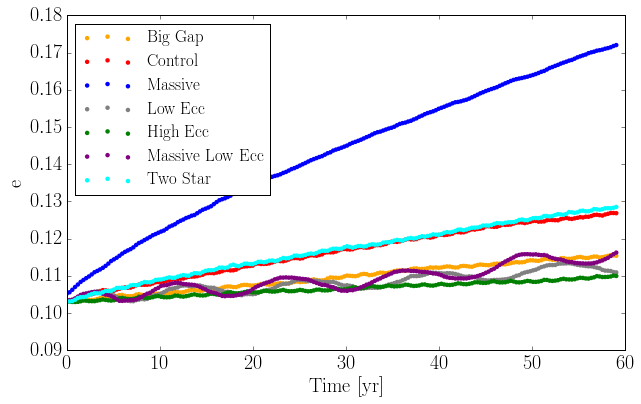

In [6]:
plt.scatter(time_bigGap,e_bigGap,c='orange',label="Big Gap",edgecolor='none')
plt.scatter(time_control,e_control,c='red',label="Control",edgecolor='none')
plt.scatter(time_massive,e_massive,c='blue',label="Massive",edgecolor='none')
plt.scatter(time_zero,e_zero,c='grey',label="Low Ecc",edgecolor='none')
plt.scatter(time_high,e_high,c='green',label="High Ecc",edgecolor='none')
plt.scatter(time_zero_massive,e_zero_massive,c='purple',label="Massive Low Ecc",edgecolor='none')
plt.scatter(time_twostar,e_twostar,c='cyan',label="Two Star",edgecolor='none')

plt.xlabel("Time [yr]")
plt.ylabel("e")
plt.xlim(0,60)
plt.legend(loc='upper left',fontsize=17)

#plt.savefig("eccPlot.pdf")

#Overplot center of mass vs time for control case and massive disk case.

In [7]:
k38_time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

k38_xCom = [-0.00454457,  0.00222326,  0.05814476,  0.01300157,  0.03076563,
        0.0217918 ,  0.03558739,  0.04425361,  0.03848567,  0.03646343,
        0.01119252,  0.02341901,  0.01778505,  0.02009843,  0.0040362 ,
        0.00574688, -0.02064092, -0.01876594, -0.02625116, -0.01336816,
       -0.03394586, -0.03526726, -0.04911308, -0.02585107, -0.03285799,
       -0.00953004,  0.0036863 ,  0.00123286,  0.03151921,  0.02067617,
        0.02449434,  0.0220583 ,  0.03116585,  0.04346915,  0.03524057,
        0.02596561,  0.02512012,  0.00436372,  0.02634879,  0.02844713,
        0.00240852, -0.00885208, -0.02370076, -0.01500769, -0.02143804,
       -0.0146484 , -0.01904378, -0.04022016, -0.02086689, -0.01895965,
       -0.02436083,  0.00369798, -0.0063196 ,  0.01434139,  0.02397766,
        0.01402513,  0.02434773,  0.02747718,  0.03747096,  0.03674009,
        0.02014759,  0.01137686,  0.01568705,  0.01463171,  0.00056065,
       -0.0170336 , -0.008541  , -0.01843412, -0.01498778, -0.01737835,
       -0.02667242, -0.03296063, -0.02974857, -0.01539208, -0.01747088,
        0.00078643,  0.02327351,  0.01954671,  0.02008032,  0.03149578,
        0.04252567,  0.027102  ,  0.0490786 ,  0.04529512,  0.02926099,
        0.02063996,  0.01617157,  0.00249151,  0.04390451, -0.00749004,
        0.00351021, -0.02060014, -0.00014371, -0.00484339, -0.01018621,
       -0.02558369, -0.0166423 , -0.02771369, -0.01443334, -0.00019525,
        0.01115656, -0.00067164,  0.01122149,  0.00380916,  0.00770683,
        0.01383052,  0.0178588 ,  0.02481323,  0.01167229,  0.0023702 ,
        0.00917851,  0.01051484,  0.00361283, -0.01135224, -0.0004724 ,
       -0.00933563, -0.00607511, -0.00274261, -0.01747805, -0.00384557,
       -0.00153904,  0.01309384,  0.016836  ,  0.03290009,  0.01329313,
        0.0313203 ,  0.01907678,  0.03088618,  0.03352333,  0.04092862,
        0.01431086,  0.0314083 ,  0.01942725,  0.00814883,  0.01948075,
        0.00842322, -0.00024634, -0.0068345 , -0.00542205, -0.00222908,
       -0.00349428, -0.01513916, -0.00614736, -0.00805471, -0.01745993,
        0.0166509 ,  0.00471416,  0.01378215,  0.01831941,  0.0081595 ,
        0.03011593,  0.02522323,  0.04173757,  0.0167448 ,  0.02382133,
        0.01075725,  0.03758115,  0.0180967 ,  0.02733755,  0.0019697 ,
        0.01227327,  0.00606348, -0.00150191,  0.00185308, -0.0241264 ,
       -0.00940795, -0.00522933, -0.0156996 , -0.00031932, -0.00553085,
        0.00559716,  0.01398201,  0.02669426,  0.0255866 ,  0.05341282,
        0.05203143,  0.04926689,  0.05578425,  0.03630451,  0.0439734 ,
        0.0516923 ,  0.04082532, -0.00046113,  0.02040009,  0.00376123,
       -0.01646215, -0.00868027, -0.04277924, -0.01458834, -0.01965854,
       -0.02102835, -0.02147889, -0.0121201 , -0.01125065,  0.01896076,
        0.01624964,  0.03488054,  0.04385876,  0.06840058]

In [8]:
k38_massive = [-0.00493578, -0.00077987,  0.0561444 ,  0.0149053 ,  0.03479318,
        0.05302308,  0.05666774,  0.04985796,  0.0380265 ,  0.04065455,
        0.02706314,  0.03752191,  0.00880063,  0.01626725, -0.0140825 ,
       -0.00820308, -0.0210637 , -0.0411128 , -0.02273422, -0.0316305 ,
       -0.02026909, -0.04656888, -0.01080621, -0.00716479, -0.01063   ,
        0.00702405,  0.02110348,  0.04828377,  0.02322512,  0.02385144,
        0.02685488,  0.04417526,  0.03117103,  0.02422405, -0.00514327,
       -0.00161213, -0.0039351 , -0.02472539, -0.02084353, -0.04467775,
       -0.03879123, -0.04354109, -0.02886696, -0.01805027, -0.02102375,
        0.01439139,  0.00306106,  0.02267905,  0.02803582,  0.04317331,
        0.0274303 ,  0.04475338,  0.02691445,  0.00893423,  0.02699692,
        0.00638395,  0.00286486, -0.03242635, -0.02944366, -0.02452057,
       -0.0336825 , -0.02879727, -0.02739204, -0.03662221, -0.01766672,
       -0.01169475, -0.00225129,  0.00302995,  0.02469138,  0.00632552,
        0.0032592 ,  0.00491219,  0.00756704,  0.00178027, -0.00358638,
       -0.00206257, -0.00889134, -0.02796236, -0.01446956, -0.02511769,
       -0.00952202, -0.02249416, -0.0188226 , -0.02515496, -0.02416892,
       -0.00212326, -0.02049787,  0.00709919, -0.01551009,  0.01911721,
        0.00215062, -0.01125198,  0.00697602,  0.0017815 ,  0.00133207,
        0.00338591, -0.00643923, -0.01841905, -0.01971283, -0.02865028,
       -0.02606195, -0.02638109, -0.01560034, -0.00805593, -0.01730545,
       -0.0129853 , -0.01318304, -0.0204024 , -0.02328375, -0.00493228,
       -0.01393158,  0.0026626 , -0.0105368 , -0.01172726, -0.03227348,
       -0.01418776, -0.02990966, -0.01720283, -0.01765978, -0.01818727,
       -0.02318689, -0.02251797, -0.03007236, -0.02351325, -0.04055851,
       -0.03004702, -0.04320597, -0.04020657, -0.03415411, -0.015857  ,
       -0.0066799 , -0.01526966, -0.00104662,  0.00242503,  0.01521372,
        0.00818382,  0.00910991, -0.00233686,  0.00813548,  0.01184398,
       -0.00981718, -0.00960509, -0.02115528, -0.04217319, -0.04762732,
       -0.06848368, -0.06422784, -0.07316067, -0.0652986 , -0.04756505,
       -0.0614458 , -0.0456828 , -0.02435785, -0.02836067, -0.01302689,
        0.00215718,  0.02949402,  0.01432893,  0.02564651,  0.0231212 ,
        0.01191144,  0.01848273,  0.00635797, -0.0204384 , -0.01660318,
       -0.03625805, -0.04624708, -0.08674328, -0.0653659 , -0.09710509,
       -0.087221  , -0.08989424, -0.11523593, -0.07780526, -0.08883719,
       -0.04059968, -0.05939427, -0.00660127,  0.01832333,  0.03620007,
        0.0662869 ,  0.09430898,  0.08526821,  0.08383229,  0.0926244 ,
        0.07137968,  0.04104392,  0.01112164, -0.01893397, -0.01972425,
       -0.0475083 , -0.06860013, -0.09511885, -0.08516644, -0.11979484,
       -0.11582945, -0.1079704 , -0.12251922, -0.11824917]

time_massive = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

In [9]:
mle_time = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

mle_xCom = [-0.00467389, -0.0158516 ,  0.01285203,  0.02086582,  0.03897056,
        0.04737313,  0.0263805 ,  0.02931338,  0.06868452,  0.04956469,
        0.12603666,  0.13149326,  0.13718049,  0.15425624,  0.13507735,
        0.13012691,  0.10129075,  0.09074991,  0.0063504 ,  0.00623373,
       -0.01476406, -0.10078144, -0.14760104, -0.13454974, -0.19424433,
       -0.24223793, -0.22696609, -0.23166531, -0.2375818 , -0.25037139,
       -0.22197454, -0.20121483, -0.12161111, -0.13616161, -0.06141767,
       -0.06355836,  0.01356082,  0.0545363 ,  0.11167708,  0.13887283,
        0.14766369,  0.21746754,  0.24366291,  0.2611928 ,  0.25325937,
        0.27624954,  0.25604459,  0.26779119,  0.24610882,  0.22155297,
        0.264894  ,  0.16951841,  0.14146701,  0.12933585,  0.05989539,
        0.0494643 ,  0.04059064, -0.0482161 , -0.11496951, -0.1147528 ,
       -0.1576099 , -0.18925741, -0.1962967 , -0.22845389, -0.26809471,
       -0.2857499 , -0.28908402, -0.2334436 , -0.24177714, -0.22518825,
       -0.21287465, -0.18097774, -0.1517306 , -0.05624411, -0.03165844,
        0.02589787,  0.04182014,  0.09228786,  0.12257628,  0.16233452,
        0.16709778,  0.20806877,  0.25989426,  0.27332335,  0.25849224,
        0.26168711,  0.25188562,  0.27671678,  0.25934663,  0.22309898,
        0.24194239,  0.22428742,  0.20666357,  0.14540701,  0.12945506,
        0.07999055,  0.06515124,  0.00342674, -0.01207878, -0.04401304,
       -0.12370709, -0.16844584, -0.22793511, -0.20431154, -0.23498796,
       -0.2614509 , -0.27084492, -0.26182778, -0.24904662, -0.21456501,
       -0.20178412, -0.19541428, -0.16665653, -0.13940304, -0.08344009,
       -0.04244119,  0.05944586,  0.09359333,  0.08990363,  0.08990138,
        0.16099221,  0.18756427,  0.2190808 ,  0.23172193,  0.23798212,
        0.24089239,  0.26251076,  0.25603335,  0.27078929,  0.29368374,
        0.29097686,  0.273489  ,  0.25326648,  0.20690074,  0.18913417,
        0.17476945,  0.16149021,  0.10965915,  0.07553265,  0.03571548,
       -0.01457099, -0.02687951, -0.07083211, -0.14432306, -0.19963914,
       -0.23553148, -0.25687445, -0.27499408, -0.30490992, -0.30909338,
       -0.28459837, -0.23897119, -0.2046868 , -0.20062442, -0.15460747,
       -0.14927872, -0.0836892 , -0.04148137,  0.01637531,  0.00872535,
        0.0160225 ,  0.0637434 ,  0.12102349,  0.15878668,  0.16959207,
        0.19709452,  0.21957706,  0.23493153,  0.25474225,  0.27142843,
        0.2801239 ,  0.26673134,  0.27917248,  0.27709586,  0.24980333,
        0.26173474,  0.24847087,  0.22027966,  0.20641063,  0.18586301,
        0.16322085,  0.11119903,  0.05215633,  0.01320646,  0.03180808,
       -0.06971806, -0.13172203, -0.1627698 , -0.20789347, -0.22255382,
       -0.26008733, -0.28871964, -0.29052702, -0.30427152, -0.2688885 ,
       -0.27903597, -0.25331313, -0.23641336, -0.18376536]

time_k38_zero = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

k38_zero = [ -4.98622746e-03,  -1.85496335e-02,   8.59109026e-03,
         2.82979145e-02,   1.07697264e-03,  -4.49743250e-04,
         5.73601484e-02,   3.00008030e-02,   1.78467673e-02,
         9.32460032e-02,   9.30340482e-02,   1.50278998e-01,
         1.29945757e-01,   1.79189009e-01,   1.42276517e-01,
         1.65176491e-01,   1.17525626e-01,   1.61461426e-01,
         8.21204337e-02,   5.76305115e-02,   5.04564147e-02,
        -1.02911489e-02,  -3.13354478e-02,  -1.08231583e-01,
        -1.27892219e-01,  -1.62344669e-01,  -1.79450780e-01,
        -2.22427076e-01,  -2.44520620e-01,  -2.68797771e-01,
        -2.45358270e-01,  -2.23499037e-01,  -2.31491915e-01,
        -2.28660192e-01,  -1.94931825e-01,  -9.84154620e-02,
        -1.23802719e-01,  -9.29020439e-02,  -5.98701583e-02,
         4.25961373e-02,   4.66164512e-02,   1.02885701e-01,
         1.06333124e-01,   1.38526208e-01,   1.97824749e-01,
         2.13889449e-01,   2.57395419e-01,   2.42087259e-01,
         2.61323524e-01,   2.58397238e-01,   2.76448427e-01,
         2.80097741e-01,   2.36213956e-01,   2.27361915e-01,
         2.27941810e-01,   1.69388515e-01,   1.64390937e-01,
         1.05418328e-01,   8.86963453e-02,   6.87749609e-02,
        -2.07963453e-02,  -4.74452459e-02,  -5.92415186e-02,
        -9.38302607e-02,  -1.43416594e-01,  -1.93763383e-01,
        -1.90796015e-01,  -2.49572771e-01,  -2.56479971e-01,
        -2.83162553e-01,  -2.55495197e-01,  -2.81604560e-01,
        -2.62206995e-01,  -2.64583540e-01,  -2.66242803e-01,
        -1.94121719e-01,  -1.74515699e-01,  -1.70726677e-01,
        -1.73790519e-01,  -7.66574452e-02,  -6.04848497e-02,
         1.26111856e-04,  -3.23606182e-03,   3.28102021e-02,
         1.10428715e-01,   1.06968422e-01,   1.67749751e-01,
         1.97615268e-01,   2.23973486e-01,   2.20393124e-01,
         2.51018408e-01,   2.81460230e-01,   2.58516129e-01,
         2.73556951e-01,   2.63039242e-01,   2.59197212e-01,
         2.66337765e-01,   2.42256752e-01,   2.06166199e-01,
         1.90162235e-01,   1.62287122e-01,   1.18559955e-01,
         1.15266024e-01,   7.20037499e-02,   3.16534892e-03,
        -4.20074776e-02,  -6.74813044e-02,  -8.62821223e-02,
        -1.24562887e-01,  -1.30847492e-01,  -1.97877959e-01,
        -2.11731364e-01,  -2.11441446e-01,  -2.64132612e-01,
        -2.83252019e-01,  -2.72005974e-01,  -2.82321672e-01,
        -2.61625640e-01,  -2.48614175e-01,  -2.65780558e-01,
        -2.42985085e-01,  -2.00575821e-01,  -1.48704013e-01,
        -1.36283205e-01,  -6.78522868e-02,  -7.00529858e-02,
        -4.36620540e-02,   1.63906739e-02,   7.37321180e-02,
         7.56810512e-02,   1.43627817e-01,   1.60922420e-01,
         1.99430148e-01,   2.11879934e-01,   2.38638059e-01,
         2.47802728e-01,   2.65393235e-01,   2.88653771e-01,
         2.58388314e-01,   2.72276886e-01,   2.66739206e-01,
         2.62480339e-01,   2.64864558e-01,   2.54406110e-01,
         2.11889574e-01,   1.71588165e-01,   1.74501034e-01,
         1.48837890e-01,   1.19125233e-01,   6.81623565e-02,
         4.38883288e-02,  -3.84212051e-02,  -1.83606213e-02,
        -8.85367711e-02,  -1.10167741e-01,  -1.79559985e-01,
        -1.76402839e-01,  -2.08984703e-01,  -2.36952346e-01,
        -2.62286210e-01,  -3.04275482e-01,  -2.71564019e-01,
        -2.66151463e-01,  -2.85728639e-01,  -2.64433282e-01,
        -2.59975275e-01,  -2.39057998e-01,  -2.04649438e-01,
        -1.89000142e-01,  -9.50248316e-02,  -5.79131660e-02,
        -6.37453721e-02,  -3.55755089e-02,   1.47136345e-02,
         2.65607320e-02,   7.02739698e-02,   1.19271342e-01,
         1.54144388e-01,   2.01496894e-01,   2.16008919e-01,
         2.32530878e-01,   2.34405846e-01,   2.59743833e-01,
         2.68150546e-01,   2.55306457e-01,   2.78218110e-01,
         2.95309194e-01,   2.92723106e-01,   2.61166495e-01,
         2.39512554e-01,   2.24310891e-01,   2.28325825e-01,
         1.93341071e-01,   1.86692316e-01,   1.44043662e-01,
         1.37492284e-01,   6.84432393e-02,   3.61140900e-02,
        -2.78475427e-03]

time_rand_control = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

rand_control_xCom = [  2.84734108e-03,   1.41111343e-02,   9.67701100e-03,
         6.75115682e-03,   8.46276208e-03,   6.37411291e-03,
        -1.77212895e-03,   7.16230582e-03,  -1.52451878e-02,
        -1.38311950e-02,  -9.19826204e-03,  -2.91055018e-02,
        -3.85099525e-02,  -2.89142397e-02,  -2.76961552e-02,
        -3.15638342e-02,  -5.07888526e-02,  -3.77890890e-02,
        -2.82290709e-02,  -3.08158757e-02,  -3.81594027e-02,
        -2.62684159e-02,  -2.53843631e-02,  -1.18279268e-02,
        -1.50838532e-02,  -1.08679028e-03,   2.68343346e-04,
        -4.03690664e-03,   2.01355245e-03,   6.87795957e-03,
        -3.01329511e-03,   2.64606465e-03,  -7.05971832e-05,
        -7.41954858e-03,  -5.14966910e-03,  -2.28379307e-02,
        -2.59638760e-02,  -1.34519511e-02,  -3.36100183e-02,
        -1.51382813e-02,  -4.57753957e-02,  -3.05812514e-02,
        -3.52907695e-02,  -2.93911083e-02,  -3.91895762e-02,
        -2.75186143e-02,  -2.11979525e-02,  -1.95010418e-02,
        -1.92947789e-02,  -9.57165826e-03,  -5.64989426e-03,
        -8.30584772e-03,   5.37892845e-03,  -3.29959321e-03,
        -6.99829080e-03,   7.90421541e-03,  -1.90898273e-03,
        -3.08143821e-03,  -2.26060441e-02,  -8.52380704e-03,
        -1.43777755e-02,  -1.13646693e-02,  -2.65432811e-02,
        -2.04836138e-02,  -2.31859548e-02,  -1.65055264e-02,
        -2.23911526e-02,  -2.34433544e-02,  -3.15117801e-02,
        -1.86454406e-02,  -3.35962392e-02,  -1.51310328e-02,
        -1.95510217e-02,  -6.65692449e-03,  -2.86769061e-03,
         1.90945513e-03,  -4.87396136e-03,  -8.52062874e-03,
        -3.19054347e-04,  -7.13637446e-05,  -6.27096884e-03,
        -1.10129723e-02,  -9.62379916e-03,  -9.94883807e-03,
        -1.87375920e-02,  -2.55550902e-02,  -1.50496521e-02,
        -1.87886177e-02,  -2.82166877e-02,  -2.05700396e-02,
        -2.67402414e-02,  -1.68261679e-02,  -2.67092594e-02,
        -1.52510564e-02,  -1.92495719e-02,  -1.68410413e-02,
        -8.54921231e-04,  -6.62488066e-03,  -7.35914798e-03,
        -9.08468937e-03,  -4.41834616e-03,  -2.81984816e-03,
        -1.07039551e-02,  -1.68163563e-02,   1.10433921e-03,
        -1.49750655e-02,   1.93594053e-03,  -2.03210325e-02,
        -1.10941301e-02,  -9.28016518e-03,  -1.50184500e-02,
        -1.18853449e-02,  -1.74668642e-02,  -1.51349226e-02,
        -9.77346678e-03,  -2.15354274e-02,  -2.73132241e-02,
        -2.30265842e-02,  -2.58717032e-02,  -1.80813932e-02,
        -2.84810717e-02,  -1.65407000e-02,  -2.04072953e-02,
        -1.75213375e-02,  -6.48080883e-03,  -1.17473722e-02,
         7.27707460e-04,  -1.28247624e-02,   4.25811629e-03,
        -1.21922299e-02,  -8.05793477e-04,  -5.73879643e-03,
        -8.23411416e-04,  -1.26253796e-02,  -1.47597563e-02,
         2.99942208e-03,  -7.27821598e-03,  -1.36577496e-02,
        -1.68113890e-02,  -1.92920199e-02,  -1.30998981e-02,
        -1.24331255e-02,  -1.83241155e-02,  -1.87479502e-03,
        -6.96125029e-03,  -1.23291200e-02,  -9.52964733e-03,
        -4.67535447e-03,  -1.08574054e-02,  -9.18772384e-03,
        -1.62263226e-02,  -1.18456456e-02,  -6.46459424e-04,
        -5.00883390e-03,  -1.28835948e-02,  -7.35413062e-03,
        -2.81977376e-03,  -6.14287712e-04,  -1.46205594e-02,
        -1.00591105e-02,  -1.73723951e-02,  -4.88082725e-03,
        -1.13324914e-02,  -1.66810947e-02,  -2.41507334e-03,
        -1.06818586e-02,   1.24806049e-03,  -1.87935231e-02,
        -7.41838424e-03,  -6.72556289e-04,  -1.06535444e-02,
        -1.09912905e-02,  -1.83134873e-02,  -1.03038872e-02,
        -3.34860955e-03,  -2.17835663e-02,  -1.92453237e-03,
        -8.02284609e-03,  -9.65574343e-03,   8.15159544e-06,
        -1.04759837e-02,   8.36539927e-04,   9.83739348e-03,
         4.83503356e-03,  -4.32269012e-03,  -3.11517053e-03,
        -1.32885580e-02,  -2.10822213e-03,  -1.19935293e-02,
        -1.28023117e-02,  -8.06949394e-03,  -8.09258298e-03,
        -1.36431178e-02,  -4.46707907e-03,  -1.11223379e-02,
        -2.89576471e-03,  -1.27500509e-02,  -9.13442555e-03,
        -4.88514848e-03]
rand_mle_xCom = [-0.0125477 , -0.0149423 , -0.01166625,  0.00422733,  0.00537583,
        0.01155735,  0.01841942,  0.02468916,  0.03440217,  0.01586656,
        0.00680535,  0.02774941,  0.02190189,  0.04218213,  0.06076556,
        0.08431202,  0.10443653,  0.10619656,  0.12108241,  0.12990368,
        0.14057157,  0.11011601,  0.09737757,  0.07683085,  0.03753366,
        0.03802711,  0.0116977 , -0.02627178, -0.04561516, -0.07155704,
       -0.10463082, -0.12564026, -0.12831605, -0.17091756, -0.17536821,
       -0.18291229, -0.18226022, -0.17982578, -0.18671149, -0.17196704,
       -0.17392267, -0.11617551, -0.11345211, -0.0730945 , -0.05754622,
       -0.04201468, -0.00977464,  0.02946814,  0.05501927,  0.06573308,
        0.07408684,  0.11910413,  0.14173837,  0.16448141,  0.17228199,
        0.18780741,  0.19499174,  0.1875423 ,  0.19223995,  0.19664859,
        0.191691  ,  0.16535768,  0.15417449,  0.14186277,  0.12824791,
        0.11859431,  0.08490286,  0.08221593,  0.04946775,  0.01742821,
       -0.00663414, -0.06010608, -0.06695481, -0.0744334 , -0.09367615,
       -0.138567  , -0.16127002, -0.15429367, -0.17935902, -0.18351137,
       -0.19631873, -0.19648325, -0.21261558, -0.19675715, -0.18337454,
       -0.18121987, -0.17588941, -0.15442136, -0.10963565, -0.09276703,
       -0.05211408, -0.07495447, -0.0409037 ,  0.02750837,  0.05033854,
        0.07521098,  0.07703766,  0.11397355,  0.13512903,  0.15523552,
        0.17566695,  0.18989744,  0.18215986,  0.19665293,  0.19966581,
        0.20529454,  0.20162433,  0.18465446,  0.17845027,  0.16953216,
        0.1735619 ,  0.13689293,  0.10695843,  0.10384759,  0.11708915,
        0.07181648,  0.01899676,  0.00072352, -0.01719879, -0.04609527,
       -0.06284807, -0.07536369, -0.10772164, -0.13471006, -0.15333457,
       -0.15954596, -0.17228173, -0.19215998, -0.1907054 , -0.19983595,
       -0.1974382 , -0.19863655, -0.18731557, -0.19158562, -0.18988783,
       -0.15460701, -0.14831687, -0.08196911, -0.10124697, -0.06746887,
       -0.04681344, -0.02232905,  0.03435511,  0.01300582,  0.08885428,
        0.07467788,  0.12346702,  0.12468344,  0.16277936,  0.16173218,
        0.18685672,  0.18034   ,  0.17759657,  0.20559412,  0.19625476,
        0.20703161,  0.20070167,  0.19587822,  0.19209328,  0.16228598,
        0.16357264,  0.15052115,  0.11858327,  0.11552689,  0.07307567,
        0.0596242 ,  0.03601012,  0.03623183,  0.00720025, -0.02594609,
       -0.02516403, -0.07809262, -0.10121939, -0.1111359 , -0.12905688,
       -0.1509587 , -0.14543302, -0.16460725, -0.19002519, -0.19890319,
       -0.20801721, -0.20348071, -0.20717839, -0.20389298, -0.18477477,
       -0.16859207, -0.17577581, -0.15594061, -0.10515432, -0.10816951,
       -0.08014821, -0.06132953, -0.05204654,  0.0356588 ,  0.03974741,
        0.06505611,  0.08079201,  0.09469127,  0.13630153]

time_rand_mle = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

time_rand_le = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

rand_le_xCom = [ 0.00439869, -0.01880267, -0.00696368,  0.00600843,  0.0274718 ,
        0.0378041 ,  0.03465103,  0.00639449, -0.00132205,  0.00867856,
        0.01500623, -0.00570175,  0.04108884,  0.0315735 ,  0.08044485,
        0.0811498 ,  0.11726012,  0.12703938,  0.14318642,  0.12906336,
        0.14398963,  0.11323033,  0.13346889,  0.0768838 ,  0.06680475,
        0.05196591,  0.03054714, -0.00029114, -0.06094878, -0.07110373,
       -0.09126642, -0.10897915, -0.1338476 , -0.16054348, -0.15266481,
       -0.18320639, -0.17450712, -0.18807419, -0.18221513, -0.15847779,
       -0.17119019, -0.14084515, -0.1322152 , -0.10207506, -0.08870879,
       -0.0567548 , -0.05069734, -0.00252683,  0.03177937,  0.06529102,
        0.05281382,  0.08574586,  0.12314236,  0.13864941,  0.16726105,
        0.15334345,  0.18138399,  0.18828496,  0.20461176,  0.18930619,
        0.1867595 ,  0.172485  ,  0.15937742,  0.15531949,  0.13652205,
        0.12437564,  0.09311705,  0.061897  ,  0.03844184,  0.03754663,
        0.01959548, -0.05047924, -0.06941568, -0.08768225, -0.10679207,
       -0.12141266, -0.15396157, -0.16072996, -0.16200207, -0.18914509,
       -0.18414937, -0.21274883, -0.19607117, -0.18843768, -0.19320835,
       -0.18627015, -0.18441202, -0.12595563, -0.12083724, -0.08437153,
       -0.10267501, -0.05910328, -0.02970132, -0.03848433,  0.02067678,
        0.04580406,  0.06335892,  0.07957456,  0.09471654,  0.13915829,
        0.16083562,  0.16070663,  0.17544919,  0.18818477,  0.19866579,
        0.19019258,  0.19391143,  0.19745166,  0.19700863,  0.16165682,
        0.16353072,  0.12032857,  0.14634979,  0.13804595,  0.07993417,
        0.06492601,  0.02221449,  0.04193889, -0.0047609 , -0.03095252,
       -0.04880127, -0.09158766, -0.10205808, -0.13851607, -0.1397178 ,
       -0.1472392 , -0.16906135, -0.18135665, -0.19623609, -0.19212646,
       -0.21256722, -0.19022018, -0.19411265, -0.18805448, -0.18133115,
       -0.16963146, -0.11802684, -0.11580401, -0.1118558 , -0.10149323,
       -0.07224733, -0.04522682, -0.0069014 ,  0.00930574,  0.03930119,
        0.06763924,  0.08140087,  0.11963991,  0.11144885,  0.15465517,
        0.15517984,  0.17366057,  0.19055208,  0.19221716,  0.19392429,
        0.21212923,  0.18882316,  0.19573296,  0.19341245,  0.16134678,
        0.16927059,  0.15213116,  0.14624074,  0.07958314,  0.08564132,
        0.07791037,  0.04884984,  0.02110514, -0.00858644, -0.04344139,
       -0.04964482, -0.07513482, -0.11328408, -0.12796818, -0.12751452,
       -0.15471643, -0.17613553, -0.18809732, -0.19381955, -0.19857114,
       -0.21184769, -0.20169296, -0.20690254, -0.19900586, -0.17650754,
       -0.18434505, -0.14414949, -0.13892529, -0.11733865, -0.12647418,
       -0.10406854, -0.0435894 , -0.04355664, -0.01153667,  0.01069946,
        0.02111125,  0.06889386,  0.05869924,  0.10956047]

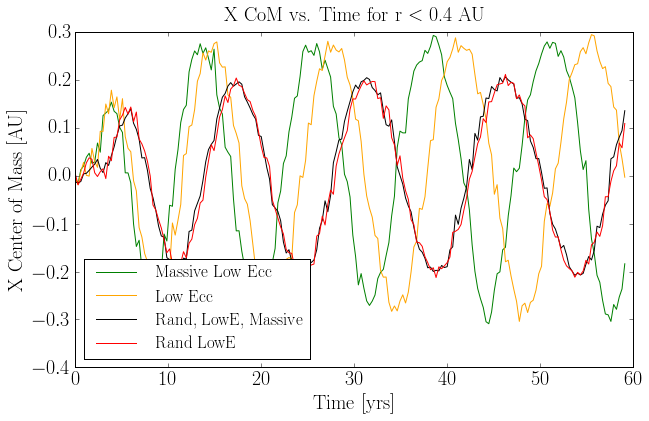

In [10]:
#plt.plot(k38_time,k38_xCom,c='blue',label="Control")
#plt.plot(time_massive,k38_massive,c='red',label='Massive')
plt.plot(mle_time,mle_xCom,c='green',label='Massive Low Ecc')
plt.plot(time_k38_zero,k38_zero,c='orange',label='Low Ecc')
#plt.plot(time_rand_control,rand_control_xCom,c='cyan',label="Random Control")
plt.plot(time_rand_mle,rand_mle_xCom,c='black',label='Rand, LowE, Massive')
plt.plot(time_rand_le,rand_le_xCom,c='red',label="Rand LowE")

plt.xlabel("Time [yrs]")
plt.ylabel("X Center of Mass [AU]")
plt.legend(loc='lower left',fontsize=17)
plt.title(r"X CoM vs. Time for r $<$ 0.4 AU",y=1.02)

#plt.savefig("selectComVsTime.pdf")

#Plot initial Center of Mass radial profiles

In [11]:
r_massive = [ 0.13810712,  0.14475894,  0.15141077,  0.15806259,  0.16471442,
        0.17136625,  0.17801807,  0.1846699 ,  0.19132172,  0.19797355,
        0.20462537,  0.2112772 ,  0.21792902,  0.22458085,  0.23123268,
        0.2378845 ,  0.24453633,  0.25118815,  0.25783998,  0.2644918 ,
        0.27114363,  0.27779545,  0.28444728,  0.29109911,  0.29775093,
        0.30440276,  0.31105458,  0.31770641,  0.32435823,  0.33101006,
        0.33766188,  0.34431371,  0.35096554,  0.35761736,  0.36426919,
        0.37092101,  0.37757284,  0.38422466,  0.39087649,  0.39752832,
        0.40418014,  0.41083197,  0.41748379,  0.42413562,  0.43078744,
        0.43743927,  0.44409109,  0.45074292,  0.45739475,  0.46404657,
        0.4706984 ,  0.47735022,  0.48400205,  0.49065387,  0.4973057 ,
        0.50395752,  0.51060935,  0.51726118,  0.523913  ,  0.53056483,
        0.53721665,  0.54386848,  0.5505203 ,  0.55717213,  0.56382395,
        0.57047578,  0.57712761,  0.58377943,  0.59043126,  0.59708308,
        0.60373491,  0.61038673,  0.61703856,  0.62369038,  0.63034221,
        0.63699404,  0.64364586,  0.65029769,  0.65694951,  0.66360134,
        0.67025316,  0.67690499,  0.68355681,  0.69020864,  0.69686047,
        0.70351229,  0.71016412,  0.71681594,  0.72346777,  0.73011959,
        0.73677142,  0.74342324,  0.75007507,  0.7567269 ,  0.76337872,
        0.77003055,  0.77668237,  0.7833342 ,  0.78998602,  0.79663785,
        0.80328967,  0.8099415 ,  0.81659333,  0.82324515,  0.82989698,
        0.8365488 ,  0.84320063,  0.84985245,  0.85650428,  0.8631561 ,
        0.86980793,  0.87645976,  0.88311158,  0.88976341,  0.89641523,
        0.90306706,  0.90971888,  0.91637071,  0.92302254,  0.92967436,
        0.93632619,  0.94297801,  0.94962984,  0.95628166,  0.96293349,
        0.96958531,  0.97623714,  0.98288897,  0.98954079,  0.99619262,
        1.00284444,  1.00949627,  1.01614809,  1.02279992,  1.02945174,
        1.03610357,  1.0427554 ,  1.04940722,  1.05605905,  1.06271087,
        1.0693627 ,  1.07601452,  1.08266635,  1.08931817,  1.09597   ,
        1.10262183,  1.10927365,  1.11592548,  1.1225773 ,  1.12922913,
        1.13588095,  1.14253278,  1.1491846 ,  1.15583643,  1.16248826,
        1.16914008,  1.17579191,  1.18244373,  1.18909556,  1.19574738,
        1.20239921,  1.20905103,  1.21570286,  1.22235469,  1.22900651,
        1.23565834,  1.24231016,  1.24896199,  1.25561381,  1.26226564,
        1.26891746,  1.27556929,  1.28222112,  1.28887294,  1.29552477,
        1.30217659,  1.30882842,  1.31548024,  1.32213207,  1.32878389,
        1.33543572,  1.34208755,  1.34873937,  1.3553912 ,  1.36204302,
        1.36869485,  1.37534667,  1.3819985 ,  1.38865032,  1.39530215,
        1.40195398,  1.4086058 ,  1.41525763,  1.42190945,  1.42856128,
        1.4352131 ,  1.44186493,  1.44851676,  1.45516858,  1.46182041]

com_massive = [  1.31297397e-01,   4.74337414e-02,   9.26543353e-02,
         1.65881476e-01,   1.72304805e-01,   5.50284910e-02,
         6.75446510e-02,   5.96930623e-02,   6.19951479e-02,
         5.06529513e-02,   5.68088806e-02,   3.83151847e-03,
         4.47107074e-02,   4.47081551e-02,   3.70827024e-02,
         1.52334323e-02,   7.34697502e-03,   2.51743581e-03,
         2.25958195e-04,   7.69715175e-04,   6.06044415e-03,
         1.45999685e-02,   1.92032519e-02,   2.38378512e-02,
         1.94359306e-02,   1.11847824e-02,   3.05609992e-03,
         1.44763299e-02,   1.79471777e-02,   1.31296048e-02,
         5.62294879e-04,   1.06687481e-02,   1.59576945e-02,
         1.10234467e-02,   1.47857209e-03,   9.18787765e-03,
         1.32678451e-02,   1.15153295e-02,   2.22246775e-03,
         5.50834232e-03,   1.20928242e-02,   1.14664227e-02,
         6.96409632e-03,   8.33175141e-04,   7.57926519e-03,
         1.15352358e-02,   1.02393208e-02,   6.70908024e-03,
         2.48619759e-04,   5.59858793e-03,   1.02676591e-02,
         1.03174567e-02,   9.24449004e-03,   3.84311073e-03,
         4.69447288e-04,   6.13743578e-03,   8.53606682e-03,
         1.07421900e-02,   8.91978530e-03,   6.93440013e-03,
         2.26701627e-03,   1.18893609e-03,   5.82492430e-03,
         7.82483691e-03,   1.00666599e-02,   9.22824522e-03,
         8.64800910e-03,   5.56676491e-03,   3.38161120e-03,
         7.46456015e-04,   3.06714332e-03,   6.61392836e-03,
         7.70146563e-03,   9.65126467e-03,   9.09514264e-03,
         9.47445668e-03,   7.34285479e-03,   6.65027326e-03,
         3.47428272e-03,   2.52876643e-03,   9.71258424e-04,
         2.06271730e-03,   4.99235393e-03,   5.74127626e-03,
         7.83619681e-03,   8.02845729e-03,   9.45649489e-03,
         8.84736079e-03,   9.64331086e-03,   8.42058522e-03,
         8.84219544e-03,   7.15956612e-03,   7.34643090e-03,
         5.27047232e-03,   5.41216386e-03,   3.33442404e-03,
         3.28600713e-03,   1.38667841e-03,   1.38061672e-03,
         3.93588139e-04,   4.18539003e-04,   1.92349541e-03,
         1.88928333e-03,   3.35589745e-03,   3.09100001e-03,
         4.25814714e-03,   3.89744429e-03,   5.08646952e-03,
         4.60816953e-03,   5.64385772e-03,   5.06368256e-03,
         6.04088001e-03,   5.31021335e-03,   6.16837228e-03,
         5.41709792e-03,   6.17830068e-03,   5.25242333e-03,
         6.01730008e-03,   4.94112999e-03,   5.67438944e-03,
         4.60678148e-03,   5.09841336e-03,   4.05578133e-03,
         4.40392520e-03,   3.07616869e-03,   3.52153777e-03,
         1.98357105e-03,   2.33054950e-03,   6.69175342e-04,
         8.33085946e-04,   7.33407688e-04,   8.10595191e-04,
         2.30213116e-03,   2.60735998e-03,   4.10086438e-03,
         4.47781724e-03,   5.72925040e-03,   6.24932991e-03,
         7.35973912e-03,   7.71476247e-03,   8.54256787e-03,
         8.72496375e-03,   9.21027620e-03,   9.07640065e-03,
         9.15180719e-03,   8.57923008e-03,   8.20866588e-03,
         7.16664605e-03,   6.35341229e-03,   4.82163334e-03,
         3.61830195e-03,   1.69253413e-03,   3.50517057e-04,
         1.71466768e-03,   3.17328961e-03,   5.12361078e-03,
         6.37442763e-03,   7.74915688e-03,   8.55707220e-03,
         9.23366169e-03,   9.17943887e-03,   8.90714057e-03,
         7.96380165e-03,   6.75950573e-03,   5.03573970e-03,
         3.08607366e-03,   8.11293660e-04,   1.45795693e-03,
         3.76718087e-03,   5.73505651e-03,   7.47238688e-03,
         8.67811033e-03,   9.26579230e-03,   9.20774430e-03,
         8.43072143e-03,   7.04808153e-03,   5.07081046e-03,
         2.60057342e-03,   4.68835159e-05,   2.77994011e-03,
         5.25620214e-03,   7.25888199e-03,   8.80609834e-03,
         9.32083940e-03,   9.13401789e-03,   7.85112438e-03,
         6.01861998e-03,   3.28720392e-03,   4.24974565e-04,
         2.79690646e-03,   5.36098433e-03,   7.77110779e-03,
         8.97989462e-03,   9.50214186e-03,   8.55298360e-03,
         6.96234363e-03,   4.08107752e-03,   1.11836471e-03,
         2.43158665e-03,   5.30648106e-03]

control = [  1.31297397e-01,   4.74337414e-02,   9.26543353e-02,
         1.65881476e-01,   1.72304805e-01,   5.50284910e-02,
         6.75446510e-02,   5.96930623e-02,   6.19951479e-02,
         5.06529513e-02,   5.68088806e-02,   3.83151847e-03,
         4.47107074e-02,   4.47081551e-02,   3.70827024e-02,
         1.52334323e-02,   7.34697502e-03,   2.51743581e-03,
         2.25958195e-04,   7.69715175e-04,   6.06044415e-03,
         1.45999685e-02,   1.92032519e-02,   2.38378512e-02,
         1.94359306e-02,   1.11847824e-02,   3.05609992e-03,
         1.44763299e-02,   1.79471777e-02,   1.31296048e-02,
         5.62294879e-04,   1.06687481e-02,   1.59576945e-02,
         1.10234467e-02,   1.47857209e-03,   9.18787765e-03,
         1.32678451e-02,   1.15153295e-02,   2.22246775e-03,
         5.50834232e-03,   1.20928242e-02,   1.14664227e-02,
         6.96409632e-03,   8.33175141e-04,   7.57926519e-03,
         1.15352358e-02,   1.02393208e-02,   6.70908024e-03,
         2.48619759e-04,   5.59858793e-03,   1.02676591e-02,
         1.03174567e-02,   9.24449004e-03,   3.84311073e-03,
         4.69447288e-04,   6.13743578e-03,   8.53606682e-03,
         1.07421900e-02,   8.91978530e-03,   6.93440013e-03,
         2.26701627e-03,   1.18893609e-03,   5.82492430e-03,
         7.82483691e-03,   1.00666599e-02,   9.22824522e-03,
         8.64800910e-03,   5.56676491e-03,   3.38161120e-03,
         7.46456015e-04,   3.06714332e-03,   6.61392836e-03,
         7.70146563e-03,   9.65126467e-03,   9.09514264e-03,
         9.47445668e-03,   7.34285479e-03,   6.65027326e-03,
         3.47428272e-03,   2.52876643e-03,   9.71258424e-04,
         2.06271730e-03,   4.99235393e-03,   5.74127626e-03,
         7.83619681e-03,   8.02845729e-03,   9.45649489e-03,
         8.84736079e-03,   9.64331086e-03,   8.42058522e-03,
         8.84219544e-03,   7.15956612e-03,   7.34643090e-03,
         5.27047232e-03,   5.41216386e-03,   3.33442404e-03,
         3.28600713e-03,   1.38667841e-03,   1.38061672e-03,
         3.93588139e-04,   4.18539003e-04,   1.92349541e-03,
         1.88928333e-03,   3.35589745e-03,   3.09100001e-03,
         4.25814714e-03,   3.89744429e-03,   5.08646952e-03,
         4.60816953e-03,   5.64385772e-03,   5.06368256e-03,
         6.04088001e-03,   5.31021335e-03,   6.16837228e-03,
         5.41709792e-03,   6.17830068e-03,   5.25242333e-03,
         6.01730008e-03,   4.94112999e-03,   5.67438944e-03,
         4.60678148e-03,   5.09841336e-03,   4.05578133e-03,
         4.40392520e-03,   3.07616869e-03,   3.52153777e-03,
         1.98357105e-03,   2.33054950e-03,   6.69175342e-04,
         8.33085946e-04,   7.33407688e-04,   8.10595191e-04,
         2.30213116e-03,   2.60735998e-03,   4.10086438e-03,
         4.47781724e-03,   5.72925040e-03,   6.24932991e-03,
         7.35973912e-03,   7.71476247e-03,   8.54256787e-03,
         8.72496375e-03,   9.21027620e-03,   9.07640065e-03,
         9.15180719e-03,   8.57923008e-03,   8.20866588e-03,
         7.16664605e-03,   6.35341229e-03,   4.82163334e-03,
         3.61830195e-03,   1.69253413e-03,   3.50517057e-04,
         1.71466768e-03,   3.17328961e-03,   5.12361078e-03,
         6.37442763e-03,   7.74915688e-03,   8.55707220e-03,
         9.23366169e-03,   9.17943887e-03,   8.90714057e-03,
         7.96380165e-03,   6.75950573e-03,   5.03573970e-03,
         3.08607366e-03,   8.11293660e-04,   1.45795693e-03,
         3.76718087e-03,   5.73505651e-03,   7.47238688e-03,
         8.67811033e-03,   9.26579230e-03,   9.20774430e-03,
         8.43072143e-03,   7.04808153e-03,   5.07081046e-03,
         2.60057342e-03,   4.68835159e-05,   2.77994011e-03,
         5.25620214e-03,   7.25888199e-03,   8.80609834e-03,
         9.32083940e-03,   9.13401789e-03,   7.85112438e-03,
         6.01861998e-03,   3.28720392e-03,   4.24974565e-04,
         2.79690646e-03,   5.36098433e-03,   7.77110779e-03,
         8.97989462e-03,   9.50214186e-03,   8.55298360e-03,
         6.96234363e-03,   4.08107752e-03,   1.11836471e-03,
         2.43158665e-03,   5.30648106e-03]

r_control = [ 0.13810712,  0.14475894,  0.15141077,  0.15806259,  0.16471442,
        0.17136625,  0.17801807,  0.1846699 ,  0.19132172,  0.19797355,
        0.20462537,  0.2112772 ,  0.21792902,  0.22458085,  0.23123268,
        0.2378845 ,  0.24453633,  0.25118815,  0.25783998,  0.2644918 ,
        0.27114363,  0.27779545,  0.28444728,  0.29109911,  0.29775093,
        0.30440276,  0.31105458,  0.31770641,  0.32435823,  0.33101006,
        0.33766188,  0.34431371,  0.35096554,  0.35761736,  0.36426919,
        0.37092101,  0.37757284,  0.38422466,  0.39087649,  0.39752832,
        0.40418014,  0.41083197,  0.41748379,  0.42413562,  0.43078744,
        0.43743927,  0.44409109,  0.45074292,  0.45739475,  0.46404657,
        0.4706984 ,  0.47735022,  0.48400205,  0.49065387,  0.4973057 ,
        0.50395752,  0.51060935,  0.51726118,  0.523913  ,  0.53056483,
        0.53721665,  0.54386848,  0.5505203 ,  0.55717213,  0.56382395,
        0.57047578,  0.57712761,  0.58377943,  0.59043126,  0.59708308,
        0.60373491,  0.61038673,  0.61703856,  0.62369038,  0.63034221,
        0.63699404,  0.64364586,  0.65029769,  0.65694951,  0.66360134,
        0.67025316,  0.67690499,  0.68355681,  0.69020864,  0.69686047,
        0.70351229,  0.71016412,  0.71681594,  0.72346777,  0.73011959,
        0.73677142,  0.74342324,  0.75007507,  0.7567269 ,  0.76337872,
        0.77003055,  0.77668237,  0.7833342 ,  0.78998602,  0.79663785,
        0.80328967,  0.8099415 ,  0.81659333,  0.82324515,  0.82989698,
        0.8365488 ,  0.84320063,  0.84985245,  0.85650428,  0.8631561 ,
        0.86980793,  0.87645976,  0.88311158,  0.88976341,  0.89641523,
        0.90306706,  0.90971888,  0.91637071,  0.92302254,  0.92967436,
        0.93632619,  0.94297801,  0.94962984,  0.95628166,  0.96293349,
        0.96958531,  0.97623714,  0.98288897,  0.98954079,  0.99619262,
        1.00284444,  1.00949627,  1.01614809,  1.02279992,  1.02945174,
        1.03610357,  1.0427554 ,  1.04940722,  1.05605905,  1.06271087,
        1.0693627 ,  1.07601452,  1.08266635,  1.08931817,  1.09597   ,
        1.10262183,  1.10927365,  1.11592548,  1.1225773 ,  1.12922913,
        1.13588095,  1.14253278,  1.1491846 ,  1.15583643,  1.16248826,
        1.16914008,  1.17579191,  1.18244373,  1.18909556,  1.19574738,
        1.20239921,  1.20905103,  1.21570286,  1.22235469,  1.22900651,
        1.23565834,  1.24231016,  1.24896199,  1.25561381,  1.26226564,
        1.26891746,  1.27556929,  1.28222112,  1.28887294,  1.29552477,
        1.30217659,  1.30882842,  1.31548024,  1.32213207,  1.32878389,
        1.33543572,  1.34208755,  1.34873937,  1.3553912 ,  1.36204302,
        1.36869485,  1.37534667,  1.3819985 ,  1.38865032,  1.39530215,
        1.40195398,  1.4086058 ,  1.41525763,  1.42190945,  1.42856128,
        1.4352131 ,  1.44186493,  1.44851676,  1.45516858,  1.46182041]

r_rand = [ 0.13729841,  0.14395428,  0.15061015,  0.15726601,  0.16392188,
        0.17057775,  0.17723362,  0.18388949,  0.19054536,  0.19720123,
        0.2038571 ,  0.21051297,  0.21716884,  0.2238247 ,  0.23048057,
        0.23713644,  0.24379231,  0.25044818,  0.25710405,  0.26375992,
        0.27041579,  0.27707166,  0.28372753,  0.29038339,  0.29703926,
        0.30369513,  0.310351  ,  0.31700687,  0.32366274,  0.33031861,
        0.33697448,  0.34363035,  0.35028622,  0.35694208,  0.36359795,
        0.37025382,  0.37690969,  0.38356556,  0.39022143,  0.3968773 ,
        0.40353317,  0.41018904,  0.41684491,  0.42350078,  0.43015664,
        0.43681251,  0.44346838,  0.45012425,  0.45678012,  0.46343599,
        0.47009186,  0.47674773,  0.4834036 ,  0.49005947,  0.49671533,
        0.5033712 ,  0.51002707,  0.51668294,  0.52333881,  0.52999468,
        0.53665055,  0.54330642,  0.54996229,  0.55661816,  0.56327402,
        0.56992989,  0.57658576,  0.58324163,  0.5898975 ,  0.59655337,
        0.60320924,  0.60986511,  0.61652098,  0.62317685,  0.62983271,
        0.63648858,  0.64314445,  0.64980032,  0.65645619,  0.66311206,
        0.66976793,  0.6764238 ,  0.68307967,  0.68973554,  0.69639141,
        0.70304727,  0.70970314,  0.71635901,  0.72301488,  0.72967075,
        0.73632662,  0.74298249,  0.74963836,  0.75629423,  0.7629501 ,
        0.76960596,  0.77626183,  0.7829177 ,  0.78957357,  0.79622944,
        0.80288531,  0.80954118,  0.81619705,  0.82285292,  0.82950879,
        0.83616465,  0.84282052,  0.84947639,  0.85613226,  0.86278813,
        0.869444  ,  0.87609987,  0.88275574,  0.88941161,  0.89606748,
        0.90272334,  0.90937921,  0.91603508,  0.92269095,  0.92934682,
        0.93600269,  0.94265856,  0.94931443,  0.9559703 ,  0.96262617,
        0.96928203,  0.9759379 ,  0.98259377,  0.98924964,  0.99590551,
        1.00256138,  1.00921725,  1.01587312,  1.02252899,  1.02918486,
        1.03584073,  1.04249659,  1.04915246,  1.05580833,  1.0624642 ,
        1.06912007,  1.07577594,  1.08243181,  1.08908768,  1.09574355,
        1.10239942,  1.10905528,  1.11571115,  1.12236702,  1.12902289,
        1.13567876,  1.14233463,  1.1489905 ,  1.15564637,  1.16230224,
        1.16895811,  1.17561397,  1.18226984,  1.18892571,  1.19558158,
        1.20223745,  1.20889332,  1.21554919,  1.22220506,  1.22886093,
        1.2355168 ,  1.24217266,  1.24882853,  1.2554844 ,  1.26214027,
        1.26879614,  1.27545201,  1.28210788,  1.28876375,  1.29541962,
        1.30207549,  1.30873135,  1.31538722,  1.32204309,  1.32869896,
        1.33535483,  1.3420107 ,  1.34866657,  1.35532244,  1.36197831,
        1.36863418,  1.37529005,  1.38194591,  1.38860178,  1.39525765,
        1.40191352,  1.40856939,  1.41522526,  1.42188113,  1.428537  ,
        1.43519287,  1.44184874,  1.4485046 ,  1.45516047,  1.46181634]

com_rand = [  1.76866016e-01,   1.94339264e-01,   1.94339264e-01,
         1.24095056e-01,   1.18618442e-01,   1.05798666e-01,
         9.65520656e-02,   9.58816659e-02,   5.12572390e-02,
         3.79598492e-02,   6.54528772e-02,   3.85844819e-02,
         1.37106492e-02,   6.80648286e-04,   2.09835985e-02,
         1.20493788e-02,   2.24065800e-02,   1.68002163e-02,
         1.77257623e-02,   1.05579498e-02,   1.24814062e-02,
         5.15985655e-03,   1.08835530e-02,   6.44003468e-03,
         4.82193601e-03,   4.80436673e-03,   6.94351661e-03,
         1.08784799e-02,   7.77849387e-03,   1.56783541e-03,
         3.59371350e-03,   3.24270465e-03,   5.97061916e-03,
         6.44951928e-03,   2.67752049e-03,   4.83585865e-03,
         7.06124610e-03,   5.83815861e-03,   9.98052939e-03,
         3.90673447e-03,   6.35917170e-03,   7.14631512e-03,
         5.67571561e-03,   7.31014723e-03,   6.27986527e-03,
         4.42235735e-03,   4.23546123e-03,   4.29576406e-03,
         2.33288424e-03,   5.08041785e-03,   2.18882935e-03,
         5.52033882e-03,   3.21061782e-03,   2.75892403e-03,
         1.04210596e-03,   4.14663352e-03,   8.97935434e-03,
         7.75192792e-03,   5.61954841e-03,   5.94350478e-03,
         6.00830002e-03,   9.58715242e-03,   7.92329210e-03,
         2.81549162e-03,   3.92147642e-03,   5.25432493e-03,
         4.90330322e-03,   7.34948037e-03,   7.32837260e-03,
         5.55710714e-03,   3.67641290e-03,   5.01525911e-03,
         2.06111035e-03,   1.92573328e-03,   1.93473782e-03,
         3.42525188e-03,   3.32373706e-03,   7.11472307e-03,
         5.39672659e-03,   7.43239480e-03,   9.13657925e-03,
         9.33075788e-03,   6.23782051e-03,   3.62191365e-03,
         3.43602461e-03,   1.68860807e-03,   2.27100808e-03,
         2.99124623e-03,   3.14617835e-03,   3.11352093e-03,
         3.58890523e-03,   3.35554575e-03,   1.18752650e-03,
         4.32526951e-04,   5.48177193e-05,   5.42592744e-04,
         1.30974407e-05,   3.74783458e-03,   3.76009062e-03,
         6.87925352e-03,   6.14656134e-03,   7.83341734e-03,
         5.55311363e-03,   6.87013621e-03,   5.42785687e-03,
         5.45528024e-03,   4.82057313e-03,   5.64566606e-03,
         7.51037800e-03,   7.88348967e-03,   7.07419452e-03,
         8.70512238e-03,   7.70888923e-03,   6.32349267e-03,
         3.42772604e-03,   2.12928678e-03,   1.45743205e-05,
         2.21685142e-04,   2.53793227e-03,   3.40771087e-03,
         3.90809486e-03,   3.54521941e-03,   2.17934430e-04,
         9.58990180e-04,   2.00562477e-03,   2.84720404e-03,
         4.76001971e-03,   7.37425696e-03,   8.41553576e-03,
         9.24081580e-03,   5.90688554e-03,   4.13968441e-03,
         4.01589114e-03,   5.03231312e-03,   4.03928226e-03,
         4.57783121e-03,   6.20817237e-03,   5.50964753e-03,
         5.99697871e-03,   6.07926228e-03,   4.47426083e-03,
         4.11502869e-03,   1.65720018e-03,   2.39083765e-03,
         2.69119671e-04,   1.95814939e-04,   4.68601692e-04,
         1.86451624e-03,   3.42341552e-03,   3.70020914e-03,
         3.63397950e-03,   2.62223214e-03,   2.87934923e-03,
         2.10599855e-03,   1.84335760e-03,   1.34459912e-03,
         1.41410515e-03,   1.94511405e-03,   1.03792215e-03,
         2.53220507e-03,   4.23806426e-03,   3.36585977e-03,
         4.17620813e-03,   5.79466492e-03,   5.50930907e-03,
         2.69184712e-03,   9.93171644e-04,   8.83175291e-04,
         7.34706506e-04,   2.29928154e-04,   1.42227911e-03,
         8.61120636e-04,   1.78290889e-03,   2.09649827e-03,
         1.91429289e-03,   6.39701369e-04,   8.72217139e-04,
         1.55697171e-03,   2.62835116e-04,   5.89590341e-04,
         2.07484082e-03,   1.41850997e-03,   2.45533328e-03,
         2.37773102e-03,   2.43944522e-03,   4.70141524e-03,
         4.17834180e-03,   4.12990569e-03,   3.71305411e-03,
         3.66087442e-03,   4.52210585e-03,   5.64573093e-03,
         6.88401626e-03,   6.74847080e-03,   4.35067107e-03,
         5.38416356e-03,   5.38725760e-03,   6.08746631e-03,
         5.80726046e-03,   5.06204318e-03]

com_randMassive = [ 0.14513545,  0.04199958,  0.04199958,  0.04199958,  0.01736391,
        0.11366261,  0.07931607,  0.02341267,  0.0358663 ,  0.05727176,
        0.03355806,  0.02273783,  0.02873296,  0.02073308,  0.02337166,
        0.01796238,  0.01710655,  0.00214119,  0.00756769,  0.01583725,
        0.0139622 ,  0.00951012,  0.00430698,  0.00771639,  0.00029313,
        0.00135503,  0.0006558 ,  0.00575725,  0.00751433,  0.01175395,
        0.01097186,  0.01196449,  0.01060293,  0.00811389,  0.00190912,
        0.00186228,  0.00561411,  0.00635986,  0.00373239,  0.00313694,
        0.00398287,  0.00084581,  0.00184385,  0.00661607,  0.00710365,
        0.00127691,  0.00109867,  0.00120483,  0.00111242,  0.00187003,
        0.0013466 ,  0.00392651,  0.00336436,  0.002443  ,  0.00557309,
        0.0057339 ,  0.0077773 ,  0.00987207,  0.00957783,  0.00952128,
        0.01143845,  0.01675211,  0.01713607,  0.01800221,  0.01535182,
        0.01503728,  0.01182295,  0.01383359,  0.01116673,  0.0102388 ,
        0.00908176,  0.00634995,  0.00692825,  0.00536415,  0.00669613,
        0.00714051,  0.01032951,  0.01198003,  0.01065907,  0.0114832 ,
        0.00861948,  0.008506  ,  0.00878941,  0.00753281,  0.00851641,
        0.01078273,  0.0119822 ,  0.01350617,  0.01207705,  0.01237545,
        0.01263953,  0.01122411,  0.01426813,  0.0125304 ,  0.01408498,
        0.013351  ,  0.01167211,  0.01268494,  0.01104248,  0.0101605 ,
        0.01142807,  0.01063805,  0.01005028,  0.01135266,  0.01041574,
        0.00864961,  0.0103195 ,  0.01038568,  0.01020087,  0.01007005,
        0.01043051,  0.01057513,  0.01062516,  0.00964591,  0.01024038,
        0.00908339,  0.01133805,  0.01198622,  0.01042755,  0.00784049,
        0.00853254,  0.00917819,  0.00952584,  0.01222658,  0.0110382 ,
        0.01098758,  0.01102491,  0.01129823,  0.00945811,  0.00960259,
        0.01058198,  0.01086384,  0.00982404,  0.0110528 ,  0.01051113,
        0.01249921,  0.01134656,  0.01213149,  0.01236045,  0.01404654,
        0.01439721,  0.01258951,  0.00982822,  0.01053728,  0.0109958 ,
        0.01292569,  0.01215342,  0.01140879,  0.01322557,  0.01434707,
        0.01450623,  0.01249325,  0.01166781,  0.01291216,  0.01258098,
        0.01338257,  0.01318293,  0.01356204,  0.01156567,  0.01250233,
        0.01102061,  0.01286317,  0.01356086,  0.01352909,  0.01333918,
        0.01234987,  0.00971975,  0.00917655,  0.00839593,  0.00849632,
        0.00843938,  0.00759154,  0.00704445,  0.0081823 ,  0.00767903,
        0.00903895,  0.00949856,  0.01068389,  0.01005788,  0.00894922,
        0.00795312,  0.00779084,  0.00861181,  0.00729973,  0.00883121,
        0.01013983,  0.01116543,  0.01249085,  0.01095354,  0.00982883,
        0.00965851,  0.00935248,  0.01069838,  0.00970669,  0.00978605,
        0.01060295,  0.00978719,  0.01091344,  0.01300525,  0.01284056]

r_randMassive = [ 0.13513296,  0.14179966,  0.14846636,  0.15513305,  0.16179975,
        0.16846644,  0.17513314,  0.18179984,  0.18846653,  0.19513323,
        0.20179992,  0.20846662,  0.21513332,  0.22180001,  0.22846671,
        0.2351334 ,  0.2418001 ,  0.24846679,  0.25513349,  0.26180019,
        0.26846688,  0.27513358,  0.28180027,  0.28846697,  0.29513367,
        0.30180036,  0.30846706,  0.31513375,  0.32180045,  0.32846715,
        0.33513384,  0.34180054,  0.34846723,  0.35513393,  0.36180063,
        0.36846732,  0.37513402,  0.38180071,  0.38846741,  0.39513411,
        0.4018008 ,  0.4084675 ,  0.41513419,  0.42180089,  0.42846759,
        0.43513428,  0.44180098,  0.44846767,  0.45513437,  0.46180107,
        0.46846776,  0.47513446,  0.48180115,  0.48846785,  0.49513455,
        0.50180124,  0.50846794,  0.51513463,  0.52180133,  0.52846803,
        0.53513472,  0.54180142,  0.54846811,  0.55513481,  0.56180151,
        0.5684682 ,  0.5751349 ,  0.58180159,  0.58846829,  0.59513499,
        0.60180168,  0.60846838,  0.61513507,  0.62180177,  0.62846846,
        0.63513516,  0.64180186,  0.64846855,  0.65513525,  0.66180194,
        0.66846864,  0.67513534,  0.68180203,  0.68846873,  0.69513542,
        0.70180212,  0.70846882,  0.71513551,  0.72180221,  0.7284689 ,
        0.7351356 ,  0.7418023 ,  0.74846899,  0.75513569,  0.76180238,
        0.76846908,  0.77513578,  0.78180247,  0.78846917,  0.79513586,
        0.80180256,  0.80846926,  0.81513595,  0.82180265,  0.82846934,
        0.83513604,  0.84180274,  0.84846943,  0.85513613,  0.86180282,
        0.86846952,  0.87513622,  0.88180291,  0.88846961,  0.8951363 ,
        0.901803  ,  0.9084697 ,  0.91513639,  0.92180309,  0.92846978,
        0.93513648,  0.94180318,  0.94846987,  0.95513657,  0.96180326,
        0.96846996,  0.97513666,  0.98180335,  0.98847005,  0.99513674,
        1.00180344,  1.00847014,  1.01513683,  1.02180353,  1.02847022,
        1.03513692,  1.04180361,  1.04847031,  1.05513701,  1.0618037 ,
        1.0684704 ,  1.07513709,  1.08180379,  1.08847049,  1.09513718,
        1.10180388,  1.10847057,  1.11513727,  1.12180397,  1.12847066,
        1.13513736,  1.14180405,  1.14847075,  1.15513745,  1.16180414,
        1.16847084,  1.17513753,  1.18180423,  1.18847093,  1.19513762,
        1.20180432,  1.20847101,  1.21513771,  1.22180441,  1.2284711 ,
        1.2351378 ,  1.24180449,  1.24847119,  1.25513789,  1.26180458,
        1.26847128,  1.27513797,  1.28180467,  1.28847137,  1.29513806,
        1.30180476,  1.30847145,  1.31513815,  1.32180485,  1.32847154,
        1.33513824,  1.34180493,  1.34847163,  1.35513833,  1.36180502,
        1.36847172,  1.37513841,  1.38180511,  1.38847181,  1.3951385 ,
        1.4018052 ,  1.40847189,  1.41513859,  1.42180528,  1.42847198,
        1.43513868,  1.44180537,  1.44847207,  1.45513876,  1.46180546]

r_400 = [ 0.12262569,  0.12935492,  0.13608415,  0.14281338,  0.14954261,
        0.15627185,  0.16300108,  0.16973031,  0.17645954,  0.18318877,
        0.189918  ,  0.19664723,  0.20337646,  0.21010569,  0.21683492,
        0.22356415,  0.23029338,  0.23702261,  0.24375184,  0.25048108,
        0.25721031,  0.26393954,  0.27066877,  0.277398  ,  0.28412723,
        0.29085646,  0.29758569,  0.30431492,  0.31104415,  0.31777338,
        0.32450261,  0.33123184,  0.33796108,  0.34469031,  0.35141954,
        0.35814877,  0.364878  ,  0.37160723,  0.37833646,  0.38506569,
        0.39179492,  0.39852415,  0.40525338,  0.41198261,  0.41871184,
        0.42544108,  0.43217031,  0.43889954,  0.44562877,  0.452358  ,
        0.45908723,  0.46581646,  0.47254569,  0.47927492,  0.48600415,
        0.49273338,  0.49946261,  0.50619184,  0.51292107,  0.51965031,
        0.52637954,  0.53310877,  0.539838  ,  0.54656723,  0.55329646,
        0.56002569,  0.56675492,  0.57348415,  0.58021338,  0.58694261,
        0.59367184,  0.60040107,  0.60713031,  0.61385954,  0.62058877,
        0.627318  ,  0.63404723,  0.64077646,  0.64750569,  0.65423492,
        0.66096415,  0.66769338,  0.67442261,  0.68115184,  0.68788107,
        0.6946103 ,  0.70133954,  0.70806877,  0.714798  ,  0.72152723,
        0.72825646,  0.73498569,  0.74171492,  0.74844415,  0.75517338,
        0.76190261,  0.76863184,  0.77536107,  0.7820903 ,  0.78881954,
        0.79554877,  0.802278  ,  0.80900723,  0.81573646,  0.82246569,
        0.82919492,  0.83592415,  0.84265338,  0.84938261,  0.85611184,
        0.86284107,  0.8695703 ,  0.87629954,  0.88302877,  0.889758  ,
        0.89648723,  0.90321646,  0.90994569,  0.91667492,  0.92340415,
        0.93013338,  0.93686261,  0.94359184,  0.95032107,  0.9570503 ,
        0.96377953,  0.97050877,  0.977238  ,  0.98396723,  0.99069646,
        0.99742569,  1.00415492,  1.01088415,  1.01761338,  1.02434261,
        1.03107184,  1.03780107,  1.0445303 ,  1.05125953,  1.05798877,
        1.064718  ,  1.07144723,  1.07817646,  1.08490569,  1.09163492,
        1.09836415,  1.10509338,  1.11182261,  1.11855184,  1.12528107,
        1.1320103 ,  1.13873953,  1.14546877,  1.152198  ,  1.15892723,
        1.16565646,  1.17238569,  1.17911492,  1.18584415,  1.19257338,
        1.19930261,  1.20603184,  1.21276107,  1.2194903 ,  1.22621953,
        1.23294876,  1.239678  ,  1.24640723,  1.25313646,  1.25986569,
        1.26659492,  1.27332415,  1.28005338,  1.28678261,  1.29351184,
        1.30024107,  1.3069703 ,  1.31369953,  1.32042876,  1.327158  ,
        1.33388723,  1.34061646,  1.34734569,  1.35407492,  1.36080415,
        1.36753338,  1.37426261,  1.38099184,  1.38772107,  1.3944503 ,
        1.40117953,  1.40790876,  1.41463799,  1.42136723,  1.42809646,
        1.43482569,  1.44155492,  1.44828415,  1.45501338,  1.46174261]

com_400 = [  1.08338561e-01,   2.55569603e-02,   1.46193607e-01,
         1.60792540e-01,   4.50757517e-02,   7.71238869e-02,
         1.56211618e-02,   5.02810571e-02,   5.25566926e-02,
         4.60481790e-02,   3.36734499e-02,   3.83326702e-02,
         2.95957727e-02,   1.07504081e-02,   2.28206266e-02,
         1.31662686e-02,   2.09221014e-02,   6.84193428e-03,
         5.08363969e-03,   9.93480320e-03,   9.58636673e-03,
         6.32591461e-03,   3.59506518e-04,   8.13998924e-03,
         1.23631724e-02,   6.55166747e-03,   5.78480753e-03,
         9.90268631e-03,   1.04508483e-03,   9.95389354e-03,
         8.28191676e-04,   8.14722831e-03,   8.26932229e-04,
         8.64858199e-03,   1.07940196e-03,   6.94384353e-03,
         2.75999669e-03,   6.98794820e-03,   2.35299203e-03,
         5.87267893e-03,   2.83950996e-03,   6.40828874e-03,
         1.31962111e-03,   5.71645097e-03,   4.40110245e-04,
         6.30750920e-03,   2.54788559e-03,   4.37966410e-03,
         3.94494798e-03,   2.74339921e-03,   6.03650275e-03,
         1.91620080e-03,   3.86881710e-03,   4.08852620e-03,
         1.08780423e-03,   5.47053437e-03,   4.21774885e-03,
         8.98476476e-04,   4.51231456e-03,   3.40042427e-03,
         1.26012398e-03,   5.02798031e-03,   4.88799333e-03,
         1.16066670e-03,   2.98470068e-03,   4.48806292e-03,
         2.54840883e-03,   1.33455264e-03,   4.47318435e-03,
         5.03005986e-03,   2.84872531e-03,   7.23085831e-04,
         3.71156199e-03,   4.63080463e-03,   3.16763606e-03,
         3.48502451e-04,   2.70842712e-03,   4.63986499e-03,
         4.83382275e-03,   3.42295909e-03,   8.80453509e-04,
         1.72183533e-03,   3.64179680e-03,   4.38171721e-03,
         3.89730850e-03,   2.35461070e-03,   2.11321543e-04,
         1.90240271e-03,   3.71042064e-03,   4.72889287e-03,
         4.93634815e-03,   4.36261585e-03,   3.19823031e-03,
         1.68394390e-03,   8.11132521e-05,   1.46008456e-03,
         2.77919885e-03,   3.72979436e-03,   4.25033258e-03,
         4.37676005e-03,   4.15913451e-03,   3.57392850e-03,
         2.87912790e-03,   1.89918589e-03,   1.05148182e-03,
         1.61110479e-04,   7.41581819e-04,   1.55811688e-03,
         2.27104129e-03,   2.83860316e-03,   3.28314812e-03,
         3.65952578e-03,   3.96104377e-03,   4.07014308e-03,
         4.20372821e-03,   4.34471583e-03,   4.38286681e-03,
         4.43712072e-03,   4.37798111e-03,   4.39963911e-03,
         4.43519494e-03,   4.46540295e-03,   4.46891543e-03,
         4.46037096e-03,   4.42029249e-03,   4.41413636e-03,
         4.45046761e-03,   4.40661164e-03,   4.25797293e-03,
         4.18472933e-03,   3.95303532e-03,   3.74102741e-03,
         3.51262797e-03,   3.13367649e-03,   2.66740976e-03,
         2.09256442e-03,   1.44982773e-03,   7.75601859e-04,
         2.06627632e-05,   8.98139013e-04,   1.69933333e-03,
         2.47996158e-03,   3.22249995e-03,   3.89308485e-03,
         4.34297240e-03,   4.53910202e-03,   4.48998560e-03,
         4.14582511e-03,   3.51081193e-03,   2.61586462e-03,
         1.42512665e-03,   9.90890120e-05,   1.24906312e-03,
         2.58857148e-03,   3.66939182e-03,   4.48066075e-03,
         4.80263409e-03,   4.58592921e-03,   3.77379530e-03,
         2.50345549e-03,   9.05922363e-04,   8.61412581e-04,
         2.45210485e-03,   3.66100568e-03,   4.28705588e-03,
         4.13546456e-03,   3.27305164e-03,   1.72988809e-03,
         2.23623393e-04,   2.27239393e-03,   3.99476528e-03,
         4.97844498e-03,   5.01154080e-03,   4.03485828e-03,
         2.19447391e-03,   2.76771655e-05,   2.15369283e-03,
         3.79127779e-03,   4.26398743e-03,   3.55916402e-03,
         1.73832942e-03,   6.78044498e-04,   3.04945362e-03,
         4.70761135e-03,   5.09837740e-03,   4.03133642e-03,
         1.86323144e-03,   8.01732101e-04,   3.02925795e-03,
         4.18886487e-03,   3.71729886e-03,   1.78402977e-03,
         1.07588380e-03,   3.62228514e-03,   5.13152203e-03,
         4.85871889e-03,   2.91886256e-03,   4.49346051e-05,
         2.74710821e-03,   4.16534081e-03]


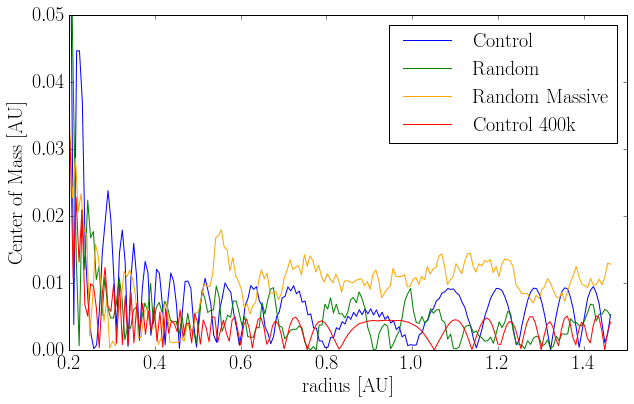

In [12]:
#plt.plot(r_massive,com_massive,color='red',label="Massive")
plt.plot(r_control,control,color='blue',label='Control')
plt.plot(r_rand,com_rand,color='green',label='Random')
plt.plot(r_randMassive,com_randMassive,color='orange',label='Random Massive')
plt.plot(r_400,com_400,color='red',label='Control 400k')

plt.xlim(0.2,1.5)
plt.ylim(0.0,0.05)
plt.xlabel("radius [AU]")
plt.ylabel("Center of Mass [AU]")
plt.legend()

#plt.savefig("comRadialProfileCrop.pdf")

In [19]:
time_control = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

diskEcc_control = [ 0.00487201,  0.04180032,  0.03851285,  0.03752069,  0.03780721,
        0.03956908,  0.04223939,  0.04201101,  0.04269907,  0.04346587,
        0.04481644,  0.04536227,  0.04443861,  0.04353817,  0.04369682,
        0.04470908,  0.04355081,  0.04240949,  0.04107202,  0.03974267,
        0.04012787,  0.03843651,  0.03686991,  0.03591092,  0.035957  ,
        0.03666101,  0.03643748,  0.03553824,  0.03578638,  0.03814097,
        0.03921233,  0.03988067,  0.04049772,  0.04217771,  0.04429624,
        0.04397485,  0.04379825,  0.0436872 ,  0.04504912,  0.0448944 ,
        0.04399126,  0.04317838,  0.04337346,  0.04307827,  0.04198505,
        0.04039283,  0.03891559,  0.0390871 ,  0.03950234,  0.03857206,
        0.03791866,  0.03760023,  0.03928343,  0.03972615,  0.03885249,
        0.03866659,  0.04026426,  0.04168991,  0.04205447,  0.04153104,
        0.04233504,  0.04278785,  0.04320669,  0.04258799,  0.04191725,
        0.04249705,  0.04270488,  0.04226141,  0.04136872,  0.04051884,
        0.04081458,  0.04074077,  0.03915969,  0.03825639,  0.03825456,
        0.03950996,  0.0393274 ,  0.03878758,  0.0390752 ,  0.04096421,
        0.04170068,  0.04114054,  0.04150873,  0.04246561,  0.04343714,
        0.04306775,  0.0424147 ,  0.04285842,  0.0431017 ,  0.04279854,
        0.0417474 ,  0.04069654,  0.04075689,  0.04120416,  0.04000833,
        0.03931684,  0.0391979 ,  0.03983416,  0.03950426,  0.03916882,
        0.03849648,  0.03971262,  0.04009718,  0.03963512,  0.03908021,
        0.04000813,  0.04112507,  0.04093958,  0.04035521,  0.04081016,
        0.04158027,  0.04256347,  0.04179268,  0.04185037,  0.04328444,
        0.04332157,  0.04305916,  0.04194896,  0.04263865,  0.04244831,
        0.04204137,  0.04059532,  0.0400513 ,  0.04045862,  0.040432  ,
        0.0393538 ,  0.03855592,  0.03933001,  0.04002192,  0.0391092 ,
        0.03849106,  0.03957885,  0.04029119,  0.04021804,  0.03972438,
        0.04020537,  0.04107444,  0.04121746,  0.04007836,  0.03983128,
        0.04049721,  0.04037862,  0.03981167,  0.03915504,  0.04001195,
        0.04090319,  0.04007406,  0.03927385,  0.03948236,  0.04038467,
        0.03961908,  0.03895531,  0.03910493,  0.04029266,  0.04039683,
        0.03956583,  0.03900967,  0.0402679 ,  0.04033355,  0.03977701,
        0.03936939,  0.04004704,  0.04111372,  0.04020798,  0.03980901,
        0.0403087 ,  0.04134421,  0.04076755,  0.04022486,  0.04014529,
        0.04147857,  0.04126809,  0.04042575,  0.03972712,  0.04066002,
        0.04039926,  0.03906719,  0.0381269 ,  0.03894483,  0.03913009,
        0.03905672,  0.03823394,  0.03939917,  0.0401762 ,  0.04006709,
        0.03936568,  0.04030915,  0.04070843,  0.0406252 ,  0.03996044,
        0.03995623,  0.04067097,  0.04043389,  0.03957182,  0.03945732,
        0.04007075,  0.04014291,  0.03936366,  0.03870979]

time_low_ecc = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

diskEcc_low_ecc = [ 0.00500734,  0.03249216,  0.0324958 ,  0.03347418,  0.03397438,
        0.03602948,  0.04041205,  0.04513343,  0.04971377,  0.05294594,
        0.05750857,  0.06076513,  0.06514267,  0.06813331,  0.07115473,
        0.074007  ,  0.07756696,  0.07947312,  0.08246412,  0.0840094 ,
        0.08677427,  0.08773907,  0.08886279,  0.09025826,  0.09189344,
        0.09272375,  0.09395771,  0.09460556,  0.09510229,  0.09579088,
        0.09626372,  0.09723888,  0.09799683,  0.09855137,  0.09846784,
        0.09910923,  0.09957972,  0.09950406,  0.09957766,  0.10077185,
        0.10130065,  0.10128989,  0.10087359,  0.10056851,  0.10161155,
        0.10215376,  0.10182201,  0.10162289,  0.10236954,  0.10232074,
        0.10284893,  0.10331323,  0.10463164,  0.10431289,  0.10469804,
        0.10512315,  0.10526233,  0.10565402,  0.10582524,  0.10628243,
        0.10644306,  0.10668714,  0.10720244,  0.10756658,  0.1078622 ,
        0.10787792,  0.10861674,  0.10898486,  0.10862385,  0.10911845,
        0.10960801,  0.11033102,  0.11009527,  0.11007839,  0.11100564,
        0.11130082,  0.11176758,  0.11247991,  0.11222803,  0.11255093,
        0.11338593,  0.11335151,  0.113533  ,  0.11372692,  0.11412401,
        0.1147058 ,  0.11475829,  0.11485172,  0.11571516,  0.11589287,
        0.1155855 ,  0.1161617 ,  0.11603841,  0.11615223,  0.11694014,
        0.11663835,  0.11579418,  0.11593714,  0.11665504,  0.11621879,
        0.11593484,  0.11648813,  0.11628673,  0.11653722,  0.11638078,
        0.11595897,  0.11636726,  0.11625445,  0.11624765,  0.11619117,
        0.11616727,  0.11645269,  0.11593247,  0.11580054,  0.11636329,
        0.11697719,  0.11659711,  0.11636697,  0.11714402,  0.11707672,
        0.11735839,  0.11759648,  0.11755906,  0.11776528,  0.11780128,
        0.11795161,  0.11834771,  0.11886222,  0.11893544,  0.11882141,
        0.11987957,  0.1197417 ,  0.11962029,  0.12000008,  0.11982921,
        0.12008821,  0.1201905 ,  0.12042185,  0.12043252,  0.12031116,
        0.11999559,  0.1203899 ,  0.12105716,  0.12093766,  0.12096428,
        0.12119392,  0.12136223,  0.12179417,  0.12183363,  0.12219711,
        0.12201712,  0.12286412,  0.12285458,  0.12352229,  0.12261333,
        0.12247145,  0.12251773,  0.12317143,  0.12336107,  0.12293545,
        0.12290551,  0.12442698,  0.12439054,  0.12401112,  0.12424855,
        0.12497671,  0.12544967,  0.12587754,  0.12542407,  0.12571893,
        0.12539773,  0.12504962,  0.1253236 ,  0.12544627,  0.12547084,
        0.12618286,  0.12595276,  0.12581871,  0.126423  ,  0.1266554 ,
        0.12674926,  0.12723005,  0.12719745,  0.12742923,  0.12821989,
        0.12743035,  0.12799925,  0.12841639,  0.12810177,  0.12837832,
        0.12859332,  0.12874983,  0.12839356,  0.12837171,  0.1285162 ,
        0.1279544 ,  0.12914065,  0.1288253 ,  0.12925462]

time_big = [  0.        ,   0.29841552,   0.59683104,   0.89524655,
         1.19366207,   1.49207759,   1.79049311,   2.08890863,
         2.38732415,   2.68573966,   2.98415518,   3.2825707 ,
         3.58098622,   3.87940174,   4.17781726,   4.47623277,
         4.77464829,   5.07306381,   5.37147933,   5.66989485,
         5.96831037,   6.26672588,   6.5651414 ,   6.86355692,
         7.16197244,   7.46038796,   7.75880348,   8.05721899,
         8.35563451,   8.65405003,   8.95246555,   9.25088107,
         9.54929659,   9.8477121 ,  10.14612762,  10.44454314,
        10.74295866,  11.04137418,  11.3397897 ,  11.63820521,
        11.93662073,  12.23503625,  12.53345177,  12.83186729,
        13.13028281,  13.42869832,  13.72711384,  14.02552936,
        14.32394488,  14.6223604 ,  14.92077591,  15.21919143,
        15.51760695,  15.81602247,  16.11443799,  16.41285351,
        16.71126902,  17.00968454,  17.30810006,  17.60651558,
        17.9049311 ,  18.20334662,  18.50176213,  18.80017765,
        19.09859317,  19.39700869,  19.69542421,  19.99383973,
        20.29225524,  20.59067076,  20.88908628,  21.1875018 ,
        21.48591732,  21.78433284,  22.08274835,  22.38116387,
        22.67957939,  22.97799491,  23.27641043,  23.57482595,
        23.87324146,  24.17165698,  24.4700725 ,  24.76848802,
        25.06690354,  25.36531906,  25.66373457,  25.96215009,
        26.26056561,  26.55898113,  26.85739665,  27.15581217,
        27.45422768,  27.7526432 ,  28.05105872,  28.34947424,
        28.64788976,  28.94630527,  29.24472079,  29.54313631,
        29.84155183,  30.13996735,  30.43838287,  30.73679838,
        31.0352139 ,  31.33362942,  31.63204494,  31.93046046,
        32.22887598,  32.52729149,  32.82570701,  33.12412253,
        33.42253805,  33.72095357,  34.01936909,  34.3177846 ,
        34.61620012,  34.91461564,  35.21303116,  35.51144668,
        35.8098622 ,  36.10827771,  36.40669323,  36.70510875,
        37.00352427,  37.30193979,  37.60035531,  37.89877082,
        38.19718634,  38.49560186,  38.79401738,  39.0924329 ,
        39.39084842,  39.68926393,  39.98767945,  40.28609497,
        40.58451049,  40.88292601,  41.18134153,  41.47975704,
        41.77817256,  42.07658808,  42.3750036 ,  42.67341912,
        42.97183463,  43.27025015,  43.56866567,  43.86708119,
        44.16549671,  44.46391223,  44.76232774,  45.06074326,
        45.35915878,  45.6575743 ,  45.95598982,  46.25440534,
        46.55282085,  46.85123637,  47.14965189,  47.44806741,
        47.74648293,  48.04489845,  48.34331396,  48.64172948,
        48.940145  ,  49.23856052,  49.53697604,  49.83539156,
        50.13380707,  50.43222259,  50.73063811,  51.02905363,
        51.32746915,  51.62588467,  51.92430018,  52.2227157 ,
        52.52113122,  52.81954674,  53.11796226,  53.41637778,
        53.71479329,  54.01320881,  54.31162433,  54.61003985,
        54.90845537,  55.20687089,  55.5052864 ,  55.80370192,
        56.10211744,  56.40053296,  56.69894848,  56.99736399,
        57.29577951,  57.59419503,  57.89261055,  58.19102607,
        58.48944159,  58.7878571 ,  59.08627262]

diskEcc_big = [ 0.00452663,  0.03243358,  0.02983582,  0.03040457,  0.03032645,
        0.02970544,  0.03007293,  0.03036386,  0.02996539,  0.02967036,
        0.02931994,  0.02937983,  0.02910522,  0.02894984,  0.02891626,
        0.02919594,  0.02915517,  0.02932477,  0.02872855,  0.02889385,
        0.0288058 ,  0.02810428,  0.02854555,  0.0282198 ,  0.02870985,
        0.02945643,  0.02865508,  0.02892784,  0.02819407,  0.02876419,
        0.02831158,  0.02852959,  0.02833462,  0.02839762,  0.02799447,
        0.02900081,  0.02801902,  0.02783154,  0.02834059,  0.02843352,
        0.02818098,  0.02801256,  0.02829004,  0.02752471,  0.02764875,
        0.02721179,  0.02756647,  0.02811435,  0.02755003,  0.02833391,
        0.0273178 ,  0.0278185 ,  0.02827539,  0.02783576,  0.028037  ,
        0.02765627,  0.02786784,  0.02790159,  0.02790293,  0.02842981,
        0.02883169,  0.02829111,  0.02783577,  0.02793857,  0.02811847,
        0.02802546,  0.02757903,  0.0276645 ,  0.02747949,  0.02749523,
        0.02751205,  0.02723744,  0.02708669,  0.02666259,  0.02703111,
        0.02745907,  0.02770839,  0.02722356,  0.0274012 ,  0.02791153,
        0.02849079,  0.0284102 ,  0.02860783,  0.02846457,  0.02850744,
        0.0285277 ,  0.02857139,  0.02879467,  0.02925537,  0.02969581,
        0.02964944,  0.02998781,  0.02981204,  0.02961448,  0.03028666,
        0.0306819 ,  0.0305565 ,  0.03066909,  0.03052845,  0.03094387,
        0.03130017,  0.0311413 ,  0.03102408,  0.03061276,  0.03100343,
        0.03012817,  0.03003209,  0.03036668,  0.02990392,  0.03047735,
        0.03096541,  0.03063264,  0.03043435,  0.03060511,  0.03121225,
        0.03130342,  0.03095234,  0.0314783 ,  0.0315868 ,  0.03133765,
        0.03156445,  0.03143622,  0.03130257,  0.03152376,  0.03168217,
        0.03151294,  0.03163209,  0.03237813,  0.03235661,  0.03197296,
        0.03217543,  0.03177609,  0.03154375,  0.03102533,  0.03089205,
        0.03129471,  0.03160046,  0.03150454,  0.0324848 ,  0.03277805,
        0.03269542,  0.03260143,  0.03216857,  0.03303556,  0.03326155,
        0.0329197 ,  0.03287568,  0.03202861,  0.03215525,  0.03220648,
        0.03257679,  0.0318202 ,  0.03204641,  0.03200471,  0.03207216,
        0.03237153,  0.03222237,  0.03221275,  0.03232164,  0.03287024,
        0.03279875,  0.03284917,  0.03279029,  0.03298939,  0.03347435,
        0.03390638,  0.03434075,  0.03419984,  0.03436798,  0.0348807 ,
        0.03512351,  0.03585873,  0.03645927,  0.03658234,  0.03682594,
        0.03727114,  0.03763314,  0.03838092,  0.0376209 ,  0.03722051,
        0.03714567,  0.03689159,  0.03617879,  0.03576647,  0.03575563,
        0.03592208,  0.03514707,  0.0357838 ,  0.03523732,  0.035734  ,
        0.03498583,  0.0355885 ,  0.03601557,  0.03585104,  0.03671906,
        0.03633384,  0.03698413,  0.03668503,  0.03657774]

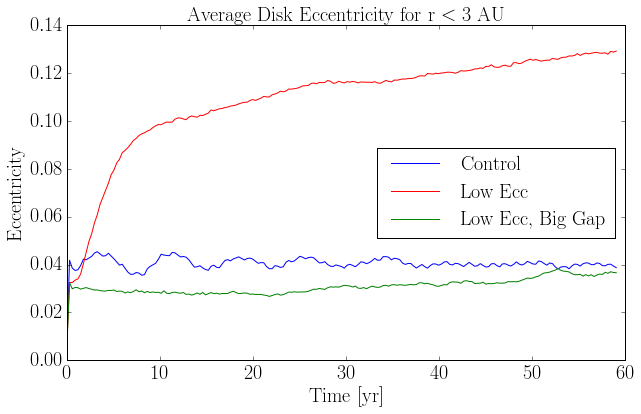

In [22]:
plt.plot(time_control,diskEcc_control,color='blue',label="Control")
plt.plot(time_low_ecc,diskEcc_low_ecc,color='red',label="Low Ecc")
plt.plot(time_big,diskEcc_big,color='green',label="Low Ecc, Big Gap")

plt.xlabel("Time [yr]")
plt.ylabel("Eccentricity")
plt.title("Average Disk Eccentricity for r $<$ 3 AU")
plt.legend(loc='center right')
#plt.savefig("diskEccComparison.pdf")